# Unemployment rate in SA

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.metrics import r2_score
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
from statsmodels.formula.api import rlm
import statsmodels.api as sm
from sklearn.utils import resample
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import re
import string


Government has published a 25-year ‘review’ focusing on the progress made by South Africa since democracy in 1994 in areas such as unemployment. Citing data from Stats SA, the review shows that 8.9 million people were employed in 1994, with an unemployment rate of 20%. However, it should be noted that the unemployment rate at that time did not include the Bantustans and the black majority. In 1994, there were 41 million South Africans, therefore the employed represented 21% of the population. By the end of 2018, the number of people employed had almost doubled to 16.5 million people, representing 28.5% of the population. Despite this, and as a consequence of an increasing population growth which surpassed the economic growth, the unemployment rate has increased to 27.1%.
This unemployment rate has continued to climb in 2019, reaching 29.1% in the third quarter – its highest rate in over 16 years. The country’s unemployment rate last reached 28% in 2003. With that being said, the purpose of this notebook is to explore variables that could potetially have a relationship with our response variables, i.e unemployment rate.

https://businesstech.co.za/news/business/353051/south-africa-unemployment-1994-vs-2019/

We will first start of by exploring which varibles have a relationship with the unemployment rate then after use those variables to answer the following questions:

### Research questions

#### Main question: How does different economic factors affect Unemployment rate ?

1. How does the government cash flow affect unemployment rate? <br>
- Unemployment adversely affects the disposable income of families, erodes purchasing power, diminishes employee morale, and reduces an economy's output, with that being said, I would like to investigate the effect of cash flow has on unemployment rate. <br>
2. Do investment returns affect the employment rate?<br>
- Increase in investments leads to economic growth which may increase job creation. My task is to investigate the significance of investments in employment. If investment returns are low, how will the unemployment rate be affected? The purpose is to find out if the government should promote the increase of investments to increase employment opportunities.
3. How does the government assets affect unemployment rate?<br>
-
4. How does the government debt affect unemployment rate?<br>
-


### Overview of Methodology

To begin, the data is cleansed to eliminate any irregularities. The cleaned data is subsequently subjected to empirical analysis in order to determine the important factors that were employed in the modeling step. An initial model was created and validated using these essential variables. After this initial model, exploratory modeling was utilized to narrow down the elements that would be included in the final model. Hypothesis testing was done to assess the final model's quality and to gather more data to aid in answering the research issue.

### Section of Contents:
- 1. Data Description
- 2. Data Collection
- 3. Reading in Data
- 4. Data Preparation
- 5. Exploratory Analysis
- 6. Model Fitting
-      6.* Hypothesis Testing
-      6.* Interpretation of Results
- 7.Conclusion


# 1. Data Description

The data was accessed
from the South African Reserve Bank (SARB). The SARB mostly collects and reports its
own data, however, a few features are sourced from Statistics South Africa. Therefore, this
data is reliable and the data generating process is transparent and accessible on the SARB
website: this refered to as the Special Data Dissemination Standard (SDDS). The data has
coverage of a number of key economic sectors in South Africa: real, fiscal, financial, and
external sector as well as population data.
It is also work noting that economic data is typically available in constant prices or current prices. Constant prices are prices as at a given date, therefore, the value today is not
affected by economic changes that would not make a non-financial difference to it. For example inflation causes prices to change, not because anything has changed about the goods
or services but because time has passed. Current prices are those that incorporate these
financial changes such as inflation. For this research we elected to use constant prices to
avoid inflation being a confounding variable across across our data. Inflation (CPI) is itself
a feature that was used for this research. <br>


* Collection method:  The collection method used was full reporting to  collect  economic  and  financial  data,  in  particular  from  commercial  banks.  This  method  is  widely  used  in  areas  where  central  banks  have  legal  authority  to  demand  full  reporting:  eg,  monetary  and  banking  statistics  (banking  supervision),  ITRS  (exchange  controls)

* Date collected: April 16, 2015
* Date Downloaded: April 07, 2021
* Data size: 1432 rows, 147 columns


In order to measure the quality of the data we need to make sure it conforms with the 5 aspects of data quality namely Validity, Accuracy, Completeness, Consistency, Uniformity

- Validity: The data conforms to a standard format but contains a few nulls which could impact our outcomes for the specific questions that we mentioned above. (See 4.Data Preparation)
- Accuracy: The data was collected from actual South African Reserve Bank Website and is therefore accurate and conforms to the real world. (See 2. Data Collection)
- Completeness: There are null entries almost in all the columns, this can be seen in section (4.Data Preparation). There are no duplicate entries present.
- Consistency: Upon looking at the data, data in fields and columns respectively appear to be in logical agreement. (See 3. Reading Data)
- Uniformity: By looking at the dataset, we are able to confirm that the same units are used across a given field. For example, all money in the ‘Net cash-flow from operating activities’ column are given in Rands and all the rates entries in the ‘unemployment rate’ column are given in percentages.

Ability to Answer Question

The dataset contains the government economic and financial statistics data in South Africa from South African Reserve Bank which compiles high-quality economic and financial statistics based on international best practice for use by policymakers, financial market participants and the general public. This reduces biasness and allows us to have the ability to generalize the answer to the proposed questions to the country level perspective.


# 2. Data Collection

### South African Reserve Bank Cleaned Economic Data

Data prepared for modelling from the South African Reserve Bank

This data can used for both regression and classification research questions i.e. forecast the unemployment rate.

The original data was sourced from https://www.resbank.co.za/en/home/what-we-do/statistics/releases/economic-and-financial-data-for-south-africa


### 1.1 The full feature set
*These feature were accessed from the South African Reserve Bank.*

*There are **147 features in total**, these cover a significant portfion of the South African economy*

**The data from 1922-01-01 to 2020-01-01** if it used for unemployment forecasting, deleting redudant observations is helpful

## 3. Reading data

In [2]:
feature_set_sarb = pd.read_csv('sarb_features_data.csv').set_index('Date') # reading in data
target = pd.read_csv('sarb_target_data.csv').set_index('Date')

In [3]:
feature_set_sarb.head() # displaying first 5 rows for exploratory varibales

,Final consumption expenditure by general government,Consolidated general government: Revenue,Foreign liabilities: Total portfolio investment,Foreign liabilities: Portfolio investment: Equity securities,Domestic output: All groups,Final consumption expenditure by households: Total,Gross fixed capital formation,SDDS - Financial derivative liabilities,Foreign liabilities: Portfolio investment: Debt securities,Change in inventories,...,Remuneration per worker in non-agricultural: Total,Consolidated general government: Non-financial assets - Net,Consolidated general government: Cash surplus / deficit,CPI Headline,Gross domestic expenditure,Net cash-flow from operating activities,Non-agricultural employment: Total,Consolidated general government: Expense,Residual item,unemployment rate
Date,,,,,,,,,,,,,,,,,,,,,
1922-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN
1922-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN
1922-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN
1922-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN
1922-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
target.head() # displaying first 5 rows for target variable

,unemployment rate
Date,
1922-01-01,NaN
1922-02-01,NaN
1922-03-01,NaN
1922-04-01,NaN
1922-05-01,NaN


# 4. Data Preparation

In this section we are going to clean raw dataset by using different techniques(Joins, removing duplicates, cleaning variables, changing types and aggregations) to remove incomplete, unreliable, or faulty entries before it’s analyzed and leveraged.

#### Validation

## Sense check
Comparing the distribution of the data before cleaning and after cleaning 

#### Sense check of raw data
Exploratory features

<AxesSubplot:ylabel='Frequency'>

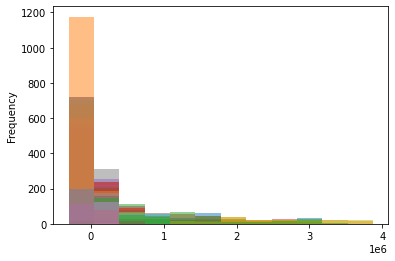

In [5]:
feature_set_sarb.plot.hist(bins=12, alpha=0.5,legend=False) # plotting distribution 

Response feature

<AxesSubplot:ylabel='Frequency'>

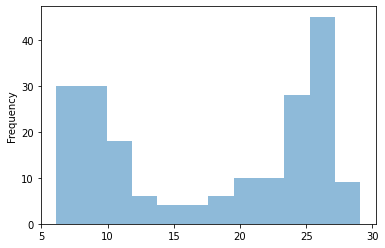

In [6]:
target.plot.hist(bins=12, alpha=0.5,legend=False)

#### Determining null values in the raw data.

In [7]:
feature_set_sarb.isnull().sum() # Determining null values

Final consumption expenditure by general government             1193
Consolidated general government: Revenue                        1318
Foreign liabilities: Total portfolio investment                 1180
Foreign liabilities: Portfolio investment: Equity securities    1180
Domestic output: All groups                                      832
                                                                ... 
Net cash-flow from operating activities                         1318
Non-agricultural employment: Total                              1233
Consolidated general government: Expense                        1318
Residual item                                                   1193
unemployment rate                                               1232
Length: 148, dtype: int64

In [8]:
target.isnull().sum() 

unemployment rate    1232
dtype: int64

## 4.1 Imputation

Imputation is the processing of compensating missing values with substitute values. We used the forward fill and backward fill method to fill null values in our data. For the remaining null entries, we used the mean  of that variable for all other cases, which has the benefit of not changing the sample mean for that variable. However, mean imputation attenuates any correlations involving the variable(s) that are imputed. This is because, in cases with imputation, there is guaranteed to be no relationship between the imputed variable and any other measured variables. 

In [9]:
# Data imputation strategy is foward fill i.e last know value imputation
# Economic data usually does not change that much from month to month.
x_values_ffill = feature_set_sarb.fillna(method='bfill') # performing forward fill in exploratory features
x_values_ffill = feature_set_sarb.fillna(method='ffill') # performing backward fill in exploratory features
y_values_ffill = target.fillna(method='bfill') # performing forward fill in response feature
y_values_ffill = target.fillna(method='ffill') # performing backward fill in exploratory features
  

In [10]:

x_values_ffill.isna().sum() 

Final consumption expenditure by general government             473
Consolidated general government: Revenue                        970
Foreign liabilities: Total portfolio investment                 412
Foreign liabilities: Portfolio investment: Equity securities    412
Domestic output: All groups                                     632
                                                               ... 
Net cash-flow from operating activities                         970
Non-agricultural employment: Total                              633
Consolidated general government: Expense                        970
Residual item                                                   473
unemployment rate                                               638
Length: 148, dtype: int64

In [11]:
y_values_ffill.isna().sum() 

unemployment rate    638
dtype: int64

In [12]:
# Remove all data points before unemployment rate data is available. Unemployment rate is my target variable.
valid_start = y_values_ffill.first_valid_index()
y_values_ffill = y_values_ffill[valid_start : ]
x_values_ffill = x_values_ffill[valid_start : ]

In [13]:
#We fill with NA here to avoid any features that might be NA i.e. insurance
x_values_ffill = x_values_ffill.fillna(feature_set_sarb.mean())
y_values_ffill = y_values_ffill.fillna(target.mean())


In [14]:
x_values_ffill.isna().sum()

Final consumption expenditure by general government             0
Consolidated general government: Revenue                        0
Foreign liabilities: Total portfolio investment                 0
Foreign liabilities: Portfolio investment: Equity securities    0
Domestic output: All groups                                     0
                                                               ..
Net cash-flow from operating activities                         0
Non-agricultural employment: Total                              0
Consolidated general government: Expense                        0
Residual item                                                   0
unemployment rate                                               0
Length: 148, dtype: int64

In [15]:
y_values_ffill.isna().sum() 

unemployment rate    0
dtype: int64

After filling the empty cells, the data is now complete.

## 4.2 Changing types

Here we check the datatypes of our features and change them to appropriate types.

In [16]:
x_values_ffill.dtypes # checking types for exploratory fetures

Final consumption expenditure by general government             float64
Consolidated general government: Revenue                        float64
Foreign liabilities: Total portfolio investment                 float64
Foreign liabilities: Portfolio investment: Equity securities    float64
Domestic output: All groups                                     float64
                                                                 ...   
Net cash-flow from operating activities                         float64
Non-agricultural employment: Total                              float64
Consolidated general government: Expense                        float64
Residual item                                                   float64
unemployment rate                                               float64
Length: 148, dtype: object

In [17]:
y_values_ffill.dtypes # checking types for target feture

unemployment rate    float64
dtype: object

All the features have correct types.

## 4.3 Slicing data

Here we remove all the features that were recorded and remain with those in the period of **1994 -2020** since **we are investigating unemployement rate in SA in 1994 - 2020**

In [18]:
x_values_ffill = x_values_ffill.loc['1994':'2021'] # getting exploratory features from 1994-2020
print(x_values_ffill.index)

Index(['1994-01-01', '1994-01-03', '1994-01-06', '1994-01-09', '1994-01-12',
       '1994-02-01', '1994-03-01', '1994-04-01', '1994-05-01', '1994-06-01',
       ...
       '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
       '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01'],
      dtype='object', name='Date', length=416)


In [19]:
y_values_ffill = y_values_ffill.loc['1994':'2021'] # getting target features from 1994-2020
print(y_values_ffill)

            unemployment rate
Date                         
1994-01-01            19.0559
1994-01-03            19.0559
1994-01-06            19.0559
1994-01-09            19.0559
1994-01-12            19.0559
...                       ...
2019-09-01            29.1000
2019-10-01            29.1000
2019-11-01            29.1000
2019-12-01            29.1000
2020-01-01            29.1000

[416 rows x 1 columns]


#### Sense check for cleaned data
Exploratory variables

<AxesSubplot:ylabel='Frequency'>

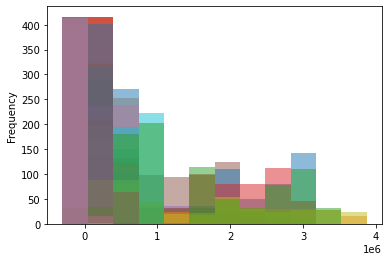

In [20]:
x_values_ffill.plot.hist(bins=12, alpha=0.5,legend=False)

Targe variable

<AxesSubplot:ylabel='Frequency'>

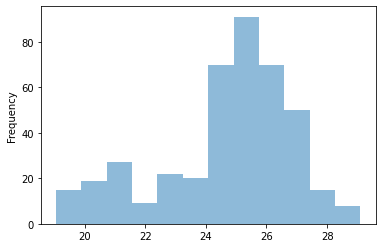

In [21]:
y_values_ffill.plot.hist(bins=12, alpha=0.5,legend=False)

It can be seen that the distributions of the raw vs cleaned data are not the same, this shows that all outdated or incorrect information are gone, leaving with the highest quality information which will improve the performance output of the results.

## 5. Exploratory Analysis

In this section we will be exploring our data by examining the structure and components of our dataset. The reason behind this section is because we want to:

- identify whether or not the dataset has any flaws
- assess whether the dataset can answer the questions we're asking.
- make a rough sketch of the response to our questions 

The approach we are going to take is to explore the dataset based on each member's question perspective and make a general conclusion to the main question. Our emperical analysis will be guided by our questions.

### Helper function
Below are the helper functions that help with removing unnecessary characters and selecting features based on the repsective questions from the original features names. <br>

Reason for removing unnecessary characters from the columns name is because of the we want to make it clean and avoid complain from pandas library when using arbitrary names.

In [22]:
def get_features(a, b):
    
    """Get features: groups features based on the repsective questions

    Parameters:
    -----------
    a and b: The common key words to access the features from original dataset

    Returns:
    --------
    df_new: a list containing all the column names required based on the key words
           
    
    """
    
    df_new = list() # empty list to store features
    x_col = x_values_ffill.columns.tolist() # converting explorator features to list
    for i in x_col:    # look for features based on key words
        if a != '' and a in i:
            df_new.append(x_values_ffill[i])
            print(i)
        if b != '' and b in i:
            df_new.append(x_values_ffill[i])
            print(i)
    return df_new # return a list with feature names



def wordopt(text):
    
    """Wordopt: removes ambigous characters from the column names

    Parameters:
    -----------
    text: a string, contains column name

    Returns:
    --------
    text: a new text with no ambiguous characters
           
    
    """
    
    text = text.lower() 
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

### Unemployement rate

Firstly,before we explore variables that could potentially have a relationship with unemployment rate, the unemployment rate from the year 1994-2020 is plotted. The plots differs by a period 6 years from 1994 to 2021, for the remaining years 2018-2021 it's only 4 years. The reason behind plotting in range of 5 years is to make them display all information without discarding some information

As it can be seen in the plots, the unemployment rate in the years 1995-1999 increases exponentially at almost a constant rate.  The unemployment rate in the years 2000-2005 increases exponentially then steadly descreases as it reached the peak where it remained constant for some time in the year 2000 then descreases afterwards. The unemployment rate in the years 2006-2011 decreases dramtically and then steadly oscillates. This is in line with the with the findings of external source (https://businesstech.co.za/news/trending/77737/south-africa-unemployment-1994-2015/) 
<br>

The unemployment rate in the years 2012-2017 oscillates and increases at the end and lastly in the years 2018-2021, it  increases exponentially at a steady rate then remain constant for some time. This is in line with the findings of external source (https://www.southafricanmi.com/south-africas-unemployment.html)

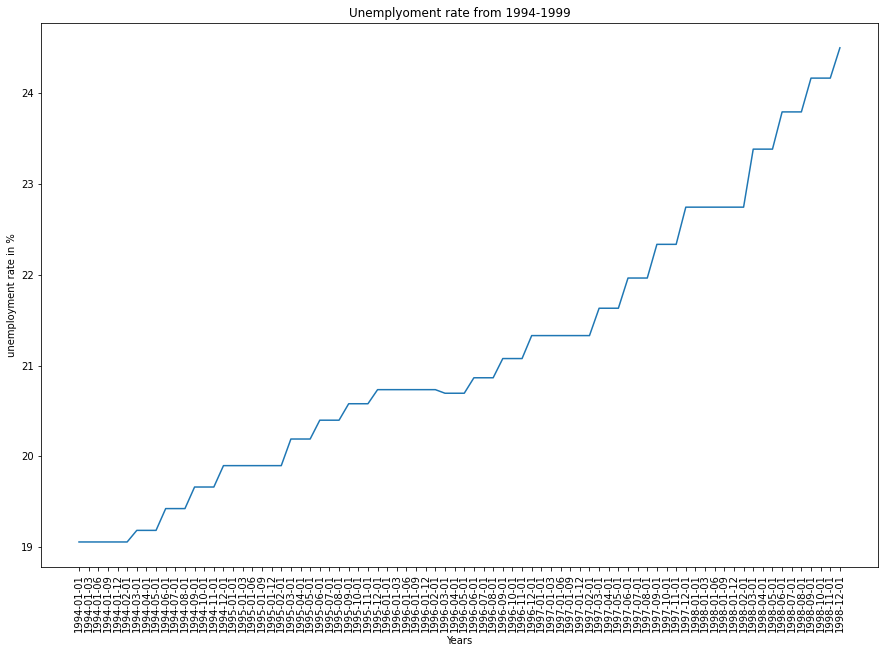

In [23]:
"""
Here we sliced the years
rotate the x label to 90 degree
the provide title, y label, x label and plot the graph
"""

fig, ax = plt.subplots(figsize=(15,10))
x_1994_1999 = x_values_ffill.loc['1994':'1999'] # slicing 5 years 

plt.xticks(rotation=90) # rotate the x label to 90 degree
plt.title("Unemplyoment rate from 1994-1999") # title
plt.ylabel("unemployment rate in %") # y label
plt.xlabel("Years") # x label
plt.plot(x_1994_1999.index, y_values_ffill["unemployment rate"].loc['1994':'1999'], label = "line 1") # plot

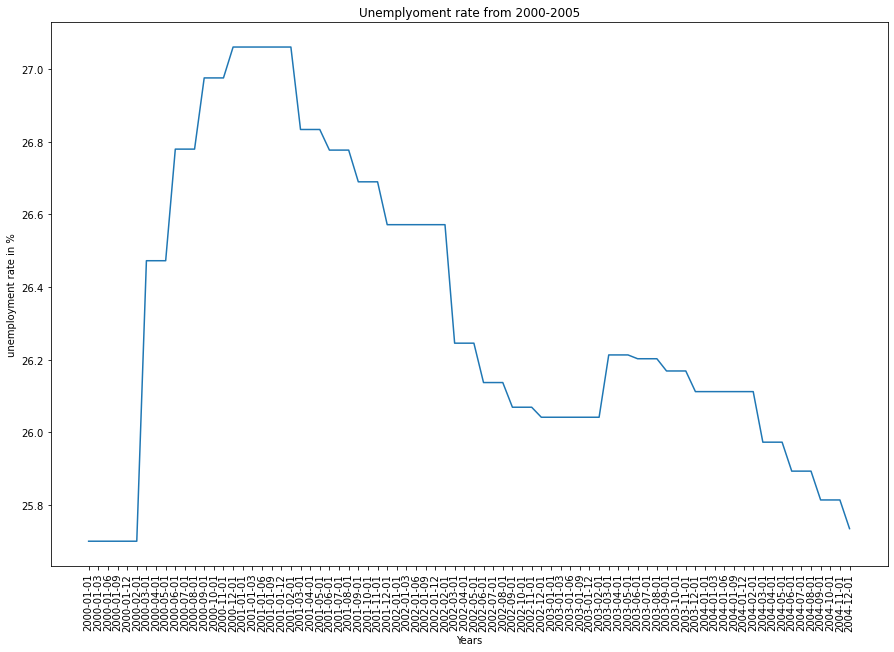

In [24]:
"""
Here we sliced the years
rotate the x label to 90 degree
the provide title, y label, x label and plot the graph
"""

fig, ax = plt.subplots(figsize=(15,10))
x_2000_2005 = x_values_ffill.loc['2000':'2005'] # slicing 5 years 

plt.xticks(rotation=90)# rotate the x label to 90 degree

plt.title("Unemplyoment rate from 2000-2005") # title

plt.ylabel("unemployment rate in %") # y label

plt.xlabel("Years") # x label

plt.plot(x_2000_2005.index, y_values_ffill["unemployment rate"].loc['2000':'2005'], label = "line 1") # plot


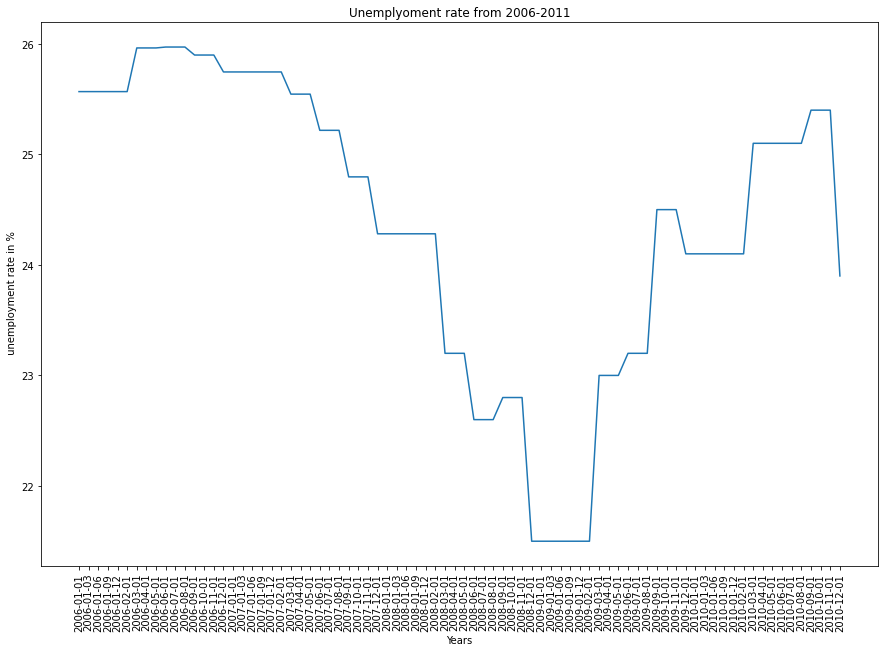

In [25]:
"""
Here we sliced the years
rotate the x label to 90 degree
the provide title, y label, x label and plot the graph
"""

fig, ax = plt.subplots(figsize=(15,10))

x_2006_2011 = x_values_ffill.loc['2006':'2011']
plt.xticks(rotation=90)
plt.title("Unemplyoment rate from 2006-2011")
plt.ylabel(" unemployment rate in %")
plt.xlabel("Years")
plt.plot(x_2006_2011.index, y_values_ffill["unemployment rate"].loc['2006':'2011'], label = "line 1")

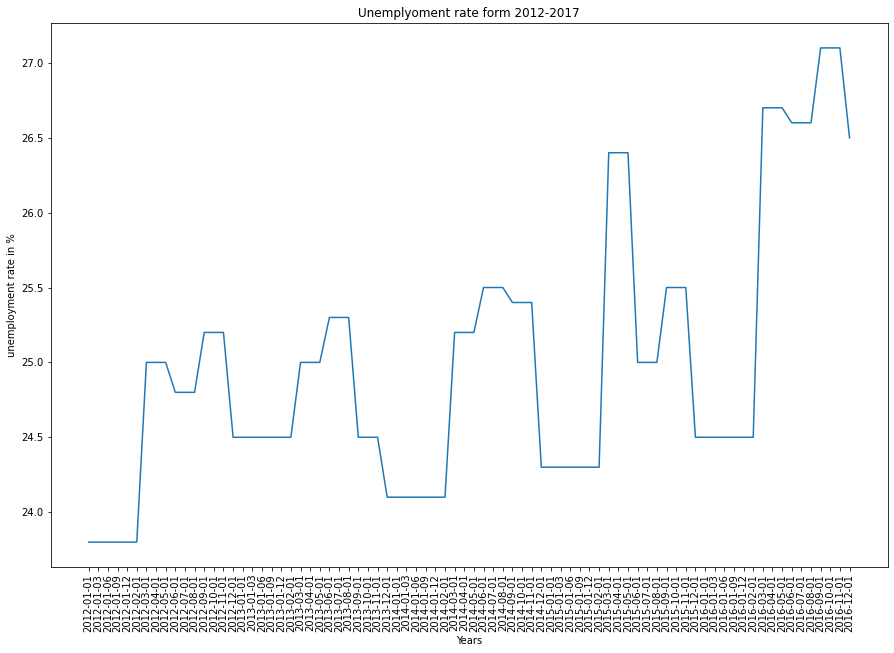

In [26]:
"""
Here we sliced the years
rotate the x label to 90 degree
the provide title, y label, x label and plot the graph
"""

fig, ax = plt.subplots(figsize=(15,10))

x_2012_2017 = x_values_ffill.loc['2012':'2017']
plt.xticks(rotation=90)
plt.title("Unemplyoment rate form 2012-2017")
plt.ylabel("unemployment rate in %")
plt.xlabel("Years")
plt.plot(x_2012_2017.index, y_values_ffill["unemployment rate"].loc['2012':'2017'], label = "line 1")

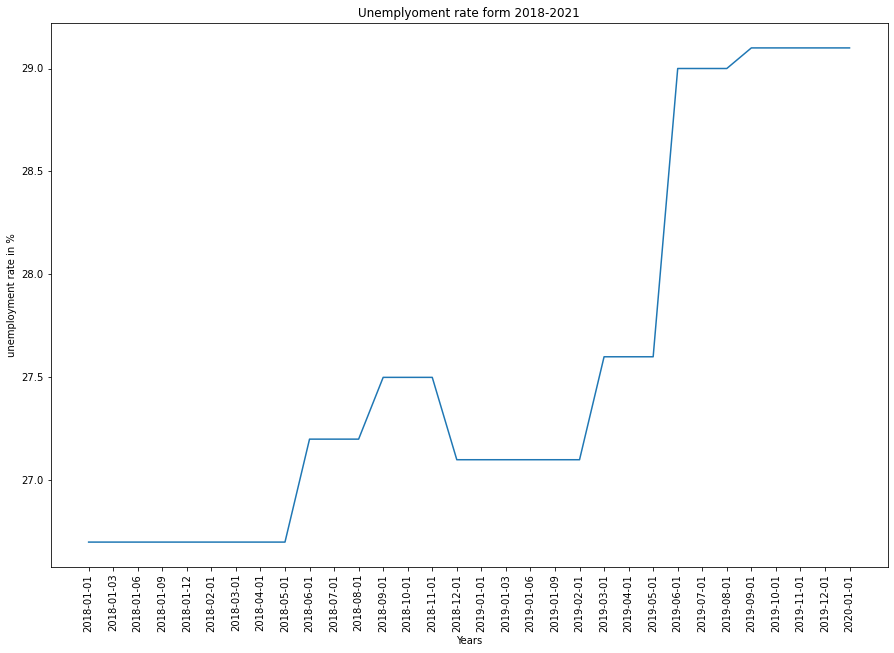

In [27]:
"""
Here we sliced the years
rotate the x label to 90 degree
the provide title, y label, x label and plot the graph
"""

fig, ax = plt.subplots(figsize=(15,10))

x_2018_2020 = x_values_ffill.loc['2018':'2021']
plt.xticks(rotation=90)
plt.title("Unemplyoment rate form 2018-2021")
plt.ylabel("unemployment rate in %")
plt.xlabel("Years")
plt.plot(x_2018_2020.index, y_values_ffill["unemployment rate"].loc['2018':'2021'], label = "line 1")

##  Exploring variables that could potentially have a relationship with unemployment rate based on different perspectives

Below we explore the dataset based on different member's perspective question. We are going to explore each features for each perspective and conclude whether the main objectives of this section (mentioned above) are fulfilled for both our repsective perspectives and main question. Reason behind using this approach is to avoid being arbitary.

### 5.1 QUESTION 1 FEATURES: ASSETS

Here we are going to explore features of the first perspective of the main question: **How does the government assets affect unemployment rate?**

In [28]:
# get column names that includes asset
asset_cols = list()
for i in x_values_ffill:
    if 'assets' in i:
        asset_cols.append(i)
asset_cols.append("unemployment rate") # add target variable so we can juxtapose our features with it

df_assets2 = x_values_ffill[asset_cols] 

# removing spaces in column names
df_assets2.rename(columns={'Portfolio investment, assets':'PortfolioInvestmentAssets',
        'Foreign assets: Portfolio investment: Debt securities': 'ForeignAssetsPortfolioInvestmentDebtSecurities',
                        'Consolidated general government: Non-financial assets - Net':'ConsolidatedGeneralGovernmentNonfinancialAssetsNet',
                          'Foreign assets: Total other investment': 'ForeignAssetsTotalOtherInvestment',
                          'Foreign assets: Total direct investment': 'ForeignAssetsTotalDirectInvestment',
                          'Other investment, assets':'OtherInvestmentAssets',
                          'Financial derivatives, assets':'FinancialDerivativesAssets',
                           'Foreign assets: Portfolio investment: Equity securities': 'ForeignAssetsPortfolioInvestmentEquitySecurities',
                          'Other domestic financial assets ':'OtherDomesticFinancialAssets',
                          'Total foreign assets':'TotalForeignAssets',
                          'Total foreign assets minus total foreign liabilities':'TotalForeignAssetsMinusTotalForeignLiabilities',
                          'Net foreign assets after valuation adjustment':'NetForeignAssetsAfterValuationAdjustment',
                          'Foreign assets: Total portfolio investment':'ForeignAssetsTotalPortfolioInvestment',
                          'Reserve assets':'ReserveAssets',
                          'Consolidated general government: Net acquisition of financial assets other than cash':'ConsolidatedGeneralGovernmentNetAcquisitionOfFinancialAssetsOtherThanCash'}
                  , inplace=True)
del df_assets2["Other reserve assets"] # this feature has zeros everywhere, hence it is removed.

df_assets2

,OtherDomesticFinancialAssets,ForeignAssetsTotalOtherInvestment,ForeignAssetsPortfolioInvestmentDebtSecurities,ForeignAssetsTotalDirectInvestment,ReserveAssets,TotalForeignAssets,ForeignAssetsTotalPortfolioInvestment,ForeignAssetsPortfolioInvestmentEquitySecurities,OtherInvestmentAssets,FinancialDerivativesAssets,TotalForeignAssetsMinusTotalForeignLiabilities,NetForeignAssetsAfterValuationAdjustment,PortfolioInvestmentAssets,ConsolidatedGeneralGovernmentNetAcquisitionOfFinancialAssetsOtherThanCash,ConsolidatedGeneralGovernmentNonfinancialAssetsNet,unemployment rate
Date,,,,,,,,,,,,,,,,
1994-01-01,-6629.442857,11.0,0.0,61.0,2083.071,81.0,1.0,0.0,1071.0,0.0,6016.0,2622.0,15.0,-507.0,-3218.0,19.0559
1994-01-03,-6629.442857,0.0,0.0,0.0,1447.000,0.0,0.0,0.0,-474.0,0.0,6016.0,2622.0,-144.0,324.0,-2979.0,19.0559
1994-01-06,-6629.442857,0.0,0.0,0.0,2312.000,0.0,0.0,0.0,-1110.0,0.0,6016.0,2622.0,-106.0,-372.0,-3223.0,19.0559
1994-01-09,-6629.442857,0.0,0.0,0.0,-3230.661,0.0,0.0,0.0,290.0,0.0,6016.0,2622.0,-53.0,-659.0,-2573.0,19.0559
1994-01-12,-6629.442857,11.0,0.0,68.0,-2323.058,91.0,0.0,0.0,-573.0,0.0,6016.0,2622.0,13.0,-91.0,-3356.0,19.0559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-01,-364.000000,598.0,156.0,3063.0,-77164.000,7247.0,2625.0,2469.0,82933.0,34845.0,826062.0,73423.0,34733.0,-33215.0,-26886.0,29.1000
2019-10-01,-364.000000,598.0,156.0,3063.0,-77164.000,7247.0,2625.0,2469.0,82933.0,34845.0,815243.0,10863.0,34733.0,-33215.0,-26886.0,29.1000
2019-11-01,-364.000000,598.0,156.0,3063.0,-77164.000,7247.0,2625.0,2469.0,82933.0,34845.0,794425.0,-7693.0,34733.0,-33215.0,-26886.0,29.1000


### Summary Staticstics
Mean is usually greater than the median. These observations indicate that there are outliers in the data set and before the final modeling is performed outliers must be taken care of.

In [29]:
df_assets2.describe()

,OtherDomesticFinancialAssets,ForeignAssetsTotalOtherInvestment,ForeignAssetsPortfolioInvestmentDebtSecurities,ForeignAssetsTotalDirectInvestment,ReserveAssets,TotalForeignAssets,ForeignAssetsTotalPortfolioInvestment,ForeignAssetsPortfolioInvestmentEquitySecurities,OtherInvestmentAssets,FinancialDerivativesAssets,TotalForeignAssetsMinusTotalForeignLiabilities,NetForeignAssetsAfterValuationAdjustment,PortfolioInvestmentAssets,ConsolidatedGeneralGovernmentNetAcquisitionOfFinancialAssetsOtherThanCash,ConsolidatedGeneralGovernmentNonfinancialAssetsNet,unemployment rate
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,1770.123626,226.838942,50.831731,842.661058,-7496.268329,2205.764423,812.978365,762.298077,4201.600962,23420.103365,250555.098558,1413.812500,-3628.908654,-8482.257212,-16595.074519,24.678195
std,19078.867668,204.349407,50.579729,1112.918468,16581.821585,2452.279771,857.122354,807.890564,24141.529812,36568.458834,246827.490204,25544.399995,20051.420275,11067.718599,11644.479364,2.229177
min,-111855.000000,0.000000,0.000000,0.000000,-77164.000000,0.000000,0.000000,0.000000,-51571.000000,0.000000,-1015.000000,-80280.000000,-51058.000000,-77035.000000,-38794.000000,19.055900
25%,-6629.442857,24.000000,6.000000,99.000000,-7623.000000,209.000000,63.000000,58.000000,-7680.000000,0.000000,28934.000000,-4608.250000,-9649.000000,-13588.000000,-26886.000000,23.800000
50%,-4357.000000,196.000000,28.000000,207.000000,-2323.058000,966.000000,432.000000,407.000000,845.000000,0.000000,162923.500000,932.500000,-3624.000000,-3485.000000,-14764.000000,25.200000
75%,15110.000000,398.000000,106.000000,1350.000000,18.000000,4136.000000,1749.000000,1627.000000,8696.500000,45985.000000,454902.500000,10621.000000,-1086.000000,-268.000000,-4425.000000,26.168800
max,55580.000000,653.000000,156.000000,3847.000000,34244.000000,7699.000000,2625.000000,2469.000000,82933.000000,148452.000000,826062.000000,124966.000000,80420.000000,20683.000000,-2115.000000,29.100000


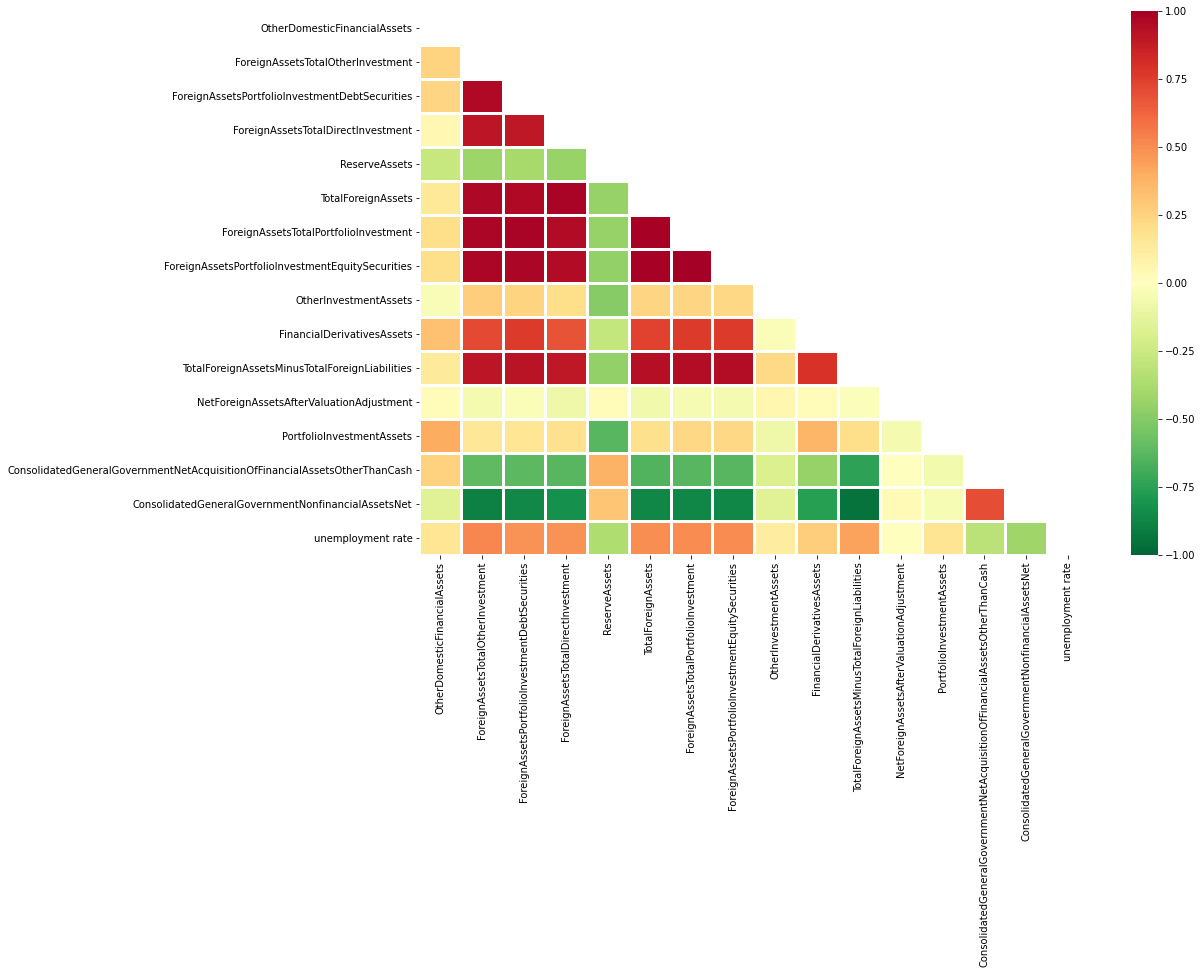

In [30]:
"""
 Below we plot the correlation plot for the asset features
"""


corr_df = df_assets2.corr(method='pearson') # correlation of the dataset

fig, ax = plt.subplots(figsize=(15,10))

mask=np.zeros_like(corr_df) 
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_df,cmap='RdYlGn_r',vmax=1.0,vmin=-1.0,mask=mask,linewidths=2.5,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

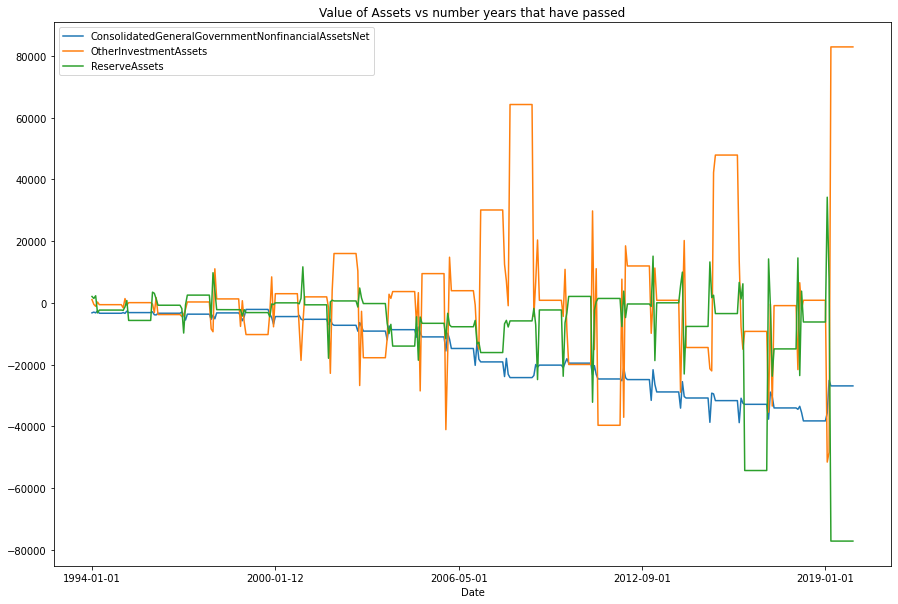

In [31]:
"""
 Below we plot line graph of  Value of Assets vs number of that have passed
 
 """

df_assets2[['ConsolidatedGeneralGovernmentNonfinancialAssetsNet', 'OtherInvestmentAssets',
           'ReserveAssets']].plot(figsize=(15,10))

plt.title('Value of Assets vs number years that have passed')
plt.show()


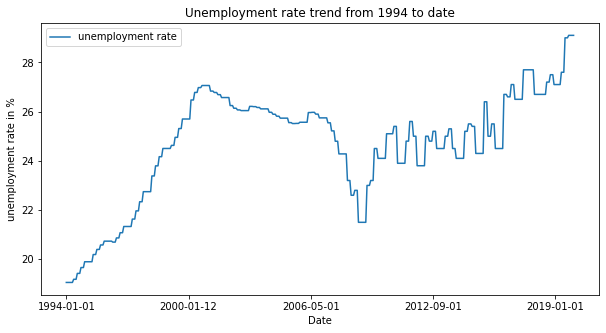

In [32]:
"""
 Below we plot a line graph of unemployment rate from 1994 to date
"""

y_values_ffill.plot(figsize=(10,5))
plt.title('Unemployment rate trend from 1994 to date')
plt.ylabel("unemployment rate in %")
plt.show()


From our above line graph it is clear that unemployment rate has been increasing since 1994. Initially it was increasing at an exponetial rate but towards the present it has remained nearly consistant. Earlier we plotted our features that showed nearly zero correlation we observed that ConsolidatedGeneralGovernmentNonfinancialAssetsNet started declining from 1996 to the present at a near linear rate , from the plot we can conclude that ConsolidatedGeneralGovernmentNonfinancialAssetsNet is negatively correlated with unemployment rate. The other two features we considered showed random pattern. We shall explore more features during modelling phase and remove inconsistent ones then.

### 5.2 QUESTION 2 FEATURES: INVESTMENT RETURNS

Here we are going to explore features of the second perspective of the main question: **Do investment returns affect the employment rate?**

In [33]:
"Select features about investment and store in a dataframe"

df_inv = get_features('unemplo', 'nvest') 
DF_INV = pd.DataFrame(data = df_inv)

Foreign liabilities: Total portfolio investment 
Foreign liabilities: Portfolio investment: Equity securities
Foreign liabilities: Portfolio investment: Debt securities
Net Investment Position
Foreign liabilities: Total other investment
Foreign assets: Total other investment
Foreign assets: Portfolio investment: Debt securities
Foreign assets: Total direct investment
Other investment, liabilities
Foreign assets: Total portfolio investment
Foreign assets: Portfolio investment: Equity securities
Other investment, assets
Portfolio investment, liabilities
Foreign liabilities: Total direct investment
Direct investment abroad
Portfolio investment, assets
Direct investment in reporting economy
unemployment rate


In [34]:
"""
Transpose the dataset and rename the target variable 
"""

X_INV= DF_INV.transpose()
df2 = x_values_ffill.rename(columns={'unemployment rate':'unemployment_rate'})
y_inv = df2['unemployment_rate']

In [35]:
"""
Renaming our features to remove special characters and spaces
"""

for col in X_INV.columns:
    new_w = wordopt(col)
    X_INV.rename(columns= {col: new_w.replace(' ', '')}, inplace = True)
X_INV.columns

Index(['foreignliabilitiestotalportfolioinvestment',
       'foreignliabilitiesportfolioinvestmentequitysecurities',
       'foreignliabilitiesportfolioinvestmentdebtsecurities',
       'netinvestmentposition', 'foreignliabilitiestotalotherinvestment',
       'foreignassetstotalotherinvestment',
       'foreignassetsportfolioinvestmentdebtsecurities',
       'foreignassetstotaldirectinvestment', 'otherinvestmentliabilities',
       'foreignassetstotalportfolioinvestment',
       'foreignassetsportfolioinvestmentequitysecurities',
       'otherinvestmentassets', 'portfolioinvestmentliabilities',
       'foreignliabilitiestotaldirectinvestment', 'directinvestmentabroad',
       'portfolioinvestmentassets', 'directinvestmentinreportingeconomy',
       'unemploymentrate'],
      dtype='object')

#### Summary statistics
It can also be seen in this plot that the mean is usually greater than the median. These observations indicate that there are outliers in these variables and before the final modeling is performed outliers must be taken care of.

In [36]:
X_INV.describe()

,foreignliabilitiestotalportfolioinvestment,foreignliabilitiesportfolioinvestmentequitysecurities,foreignliabilitiesportfolioinvestmentdebtsecurities,netinvestmentposition,foreignliabilitiestotalotherinvestment,foreignassetstotalotherinvestment,foreignassetsportfolioinvestmentdebtsecurities,foreignassetstotaldirectinvestment,otherinvestmentliabilities,foreignassetstotalportfolioinvestment,foreignassetsportfolioinvestmentequitysecurities,otherinvestmentassets,portfolioinvestmentliabilities,foreignliabilitiestotaldirectinvestment,directinvestmentabroad,portfolioinvestmentassets,directinvestmentinreportingeconomy,unemploymentrate
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,1085.487981,750.639423,334.947115,-70.911058,316.838942,226.838942,50.831731,842.661058,11580.216346,812.978365,762.298077,4201.600962,11836.509615,811.735577,-5024.533654,-3628.908654,4551.896635,24.678195
std,1183.359506,802.117123,389.081336,350.782876,297.946830,204.349407,50.579729,1112.918468,23988.249717,857.122354,807.890564,24141.529812,27922.351523,737.701048,14182.919537,20051.420275,9344.163820,2.229177
min,0.000000,0.000000,0.000000,-655.000000,0.000000,0.000000,0.000000,0.000000,-28970.000000,0.000000,0.000000,-51571.000000,-60617.000000,0.000000,-58460.000000,-51058.000000,-13910.000000,19.055900
25%,137.000000,64.000000,73.000000,-281.000000,108.000000,24.000000,6.000000,99.000000,-1251.000000,63.000000,58.000000,-7680.000000,-516.000000,81.000000,-11521.000000,-9649.000000,-449.000000,23.800000
50%,524.000000,426.000000,119.000000,-132.000000,226.000000,196.000000,28.000000,207.000000,3625.000000,432.000000,407.000000,845.000000,3277.000000,612.000000,-1634.000000,-3624.000000,2469.000000,25.200000
75%,2089.000000,1430.000000,659.000000,0.000000,501.000000,398.000000,106.000000,1350.000000,10757.000000,1749.000000,1627.000000,8696.500000,25439.000000,1596.000000,-86.000000,-1086.000000,9998.250000,26.168800
max,3628.000000,2556.000000,1277.000000,1055.000000,987.000000,653.000000,156.000000,3847.000000,112724.000000,2625.000000,2469.000000,82933.000000,94275.000000,2139.000000,42254.000000,80420.000000,52712.000000,29.100000


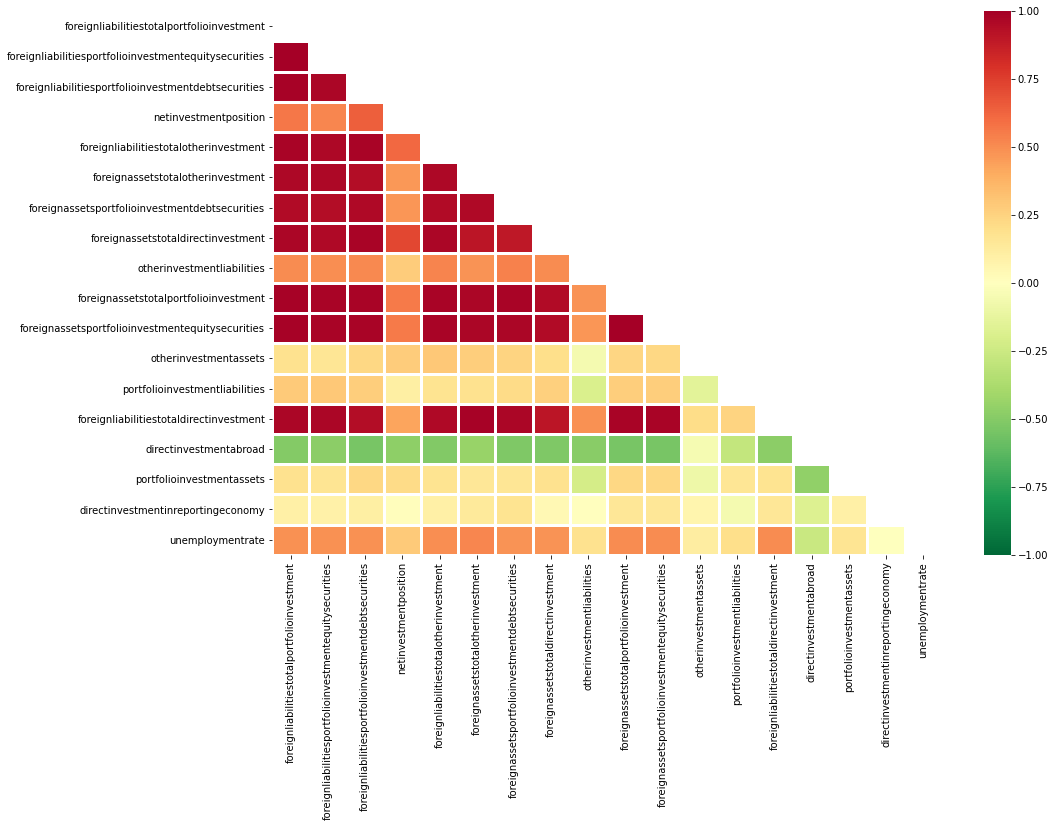

In [37]:
"""
 Below we plot the correlation plot for the asset features
"""

corr_df2 = X_INV.corr(method='pearson')

fig, ax = plt.subplots(figsize=(15,10))

mask=np.zeros_like(corr_df2)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_df2,cmap='RdYlGn_r',vmax=1.0,vmin=-1.0,mask=mask,linewidths=2.5,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

### 5.3 QUESTION 3 FEATURES: CASHFLOW

Here we are going to explore features of the third perspective of the main question: **How does the government cash flow affect unemployment rate?**

In [38]:
"Select features about cash and store in a dataframe"

df_cash = get_features('cash', '') # get appropriate feature names
DF = pd.DataFrame(data = df_cash) # create a new dataset which only contains appropriate varibales that need to be reseache

Total cash-flow revenue
Cash received from the issuance of other debt instruments less cash payments made to redeem other debt instruments, including non-marketable bills and bonds, and debt of the former TBVC-countries, self-governing territories and the Republic of Namibia that were assumed by the national government. 
Consolidated general government: Net change in the stock of cash_x
Cash received from the issuance of domestic government bonds less cash payments made to redeem domestic government bonds.
The net borrowing requirement of national government equals the net result of the cash-flow deficit/surplus and the cost of revaluation of foreign loans at redemption. 
Cash received from the issuance of foreign bonds and loans less cash payments made to redeem foreign bonds and loans.
Cash received from the issuance of Treasury bills less cash payments made to redeem Treasury bills.
The difference between cash-flow revenue and cash-flow expenditure._x
The difference between cash-flo

In [39]:
"""
Transpose the dataset and rename the target variable 
"""

DF= DF.transpose()
some_df = x_values_ffill.rename(columns={'unemployment rate':'unemployment_rate'})
y_inv = some_df['unemployment_rate']

In [40]:
"""
Renaming our features to remove special characters and spaces
"""


for col in DF.columns:
    new_w = wordopt(col)
    DF.rename(columns= {col: new_w.replace(' ', '')}, inplace = True)
DF.columns

Index(['totalcashflowrevenue',
       'cashreceivedfromtheissuanceofotherdebtinstrumentslesscashpaymentsmadetoredeemotherdebtinstrumentsincludingnonmarketablebillsandbondsanddebtoftheformertbvccountriesselfgoverningterritoriesandtherepublicofnamibiathatwereassumedbythenationalgovernment',
       'consolidatedgeneralgovernmentnetchangeinthestockofcashx',
       'cashreceivedfromtheissuanceofdomesticgovernmentbondslesscashpaymentsmadetoredeemdomesticgovernmentbonds',
       'thenetborrowingrequirementofnationalgovernmentequalsthenetresultofthecashflowdeficitsurplusandthecostofrevaluationofforeignloansatredemption',
       'cashreceivedfromtheissuanceofforeignbondsandloanslesscashpaymentsmadetoredeemforeignbondsandloans',
       'cashreceivedfromtheissuanceoftreasurybillslesscashpaymentsmadetoredeemtreasurybills',
       'thedifferencebetweencashflowrevenueandcashflowexpenditurex',
       'thedifferencebetweencashflowrevenueandcashflowexpenditurey',
       'consolidatedgeneralgovernmentne

#### Summary statistics
The median can been seen to be greater than the mean in almost all the features. These observations indicate that there are less outliers in these variables.

In [41]:
DF.describe()

,totalcashflowrevenue,cashreceivedfromtheissuanceofotherdebtinstrumentslesscashpaymentsmadetoredeemotherdebtinstrumentsincludingnonmarketablebillsandbondsanddebtoftheformertbvccountriesselfgoverningterritoriesandtherepublicofnamibiathatwereassumedbythenationalgovernment,consolidatedgeneralgovernmentnetchangeinthestockofcashx,cashreceivedfromtheissuanceofdomesticgovernmentbondslesscashpaymentsmadetoredeemdomesticgovernmentbonds,thenetborrowingrequirementofnationalgovernmentequalsthenetresultofthecashflowdeficitsurplusandthecostofrevaluationofforeignloansatredemption,cashreceivedfromtheissuanceofforeignbondsandloanslesscashpaymentsmadetoredeemforeignbondsandloans,cashreceivedfromtheissuanceoftreasurybillslesscashpaymentsmadetoredeemtreasurybills,thedifferencebetweencashflowrevenueandcashflowexpenditurex,thedifferencebetweencashflowrevenueandcashflowexpenditurey,consolidatedgeneralgovernmentnetchangeinthestockofcashy,consolidatedgeneralgovernmentnetcashflowfromfinancingactivities,consolidatedgeneralgovernmentnetacquisitionoffinancialassetsotherthancash,netcashflowfromoperatingactivities
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,-1.711538,-486.233173,12159.862981,5024.605769,-7489.641827,884.185096,1011.218750,-18664.622841,-8642.975962,12159.862981,22162.516827,-8482.257212,6592.387019
std,34.761542,1350.983044,17833.174716,8614.980747,20270.093960,5780.294274,8122.866529,14648.566475,20765.484834,17833.174716,28490.939457,11067.718599,17045.766165
min,-709.000000,-5430.000000,-48600.000000,-24288.000000,-93756.000000,-14121.000000,-63797.000000,-107881.000000,-107881.000000,-48600.000000,-31711.000000,-77035.000000,-55201.000000
25%,0.000000,-793.500000,1318.000000,1400.500000,-14590.500000,-157.000000,-1057.500000,-17795.915254,-16307.500000,1318.000000,1698.000000,-13588.000000,-2101.000000
50%,0.000000,-22.000000,8262.000000,3256.500000,-3426.000000,0.000000,529.000000,-17795.915254,-3147.500000,8262.000000,13828.000000,-3485.000000,8963.000000
75%,0.000000,0.000000,18548.000000,11197.250000,2126.000000,3.000000,2635.750000,-17795.915254,1937.000000,18548.000000,34541.250000,-268.000000,15146.000000
max,0.000000,14045.000000,66539.000000,31941.000000,70466.000000,76052.000000,44540.000000,44018.000000,44018.000000,66539.000000,114791.000000,20683.000000,35605.000000


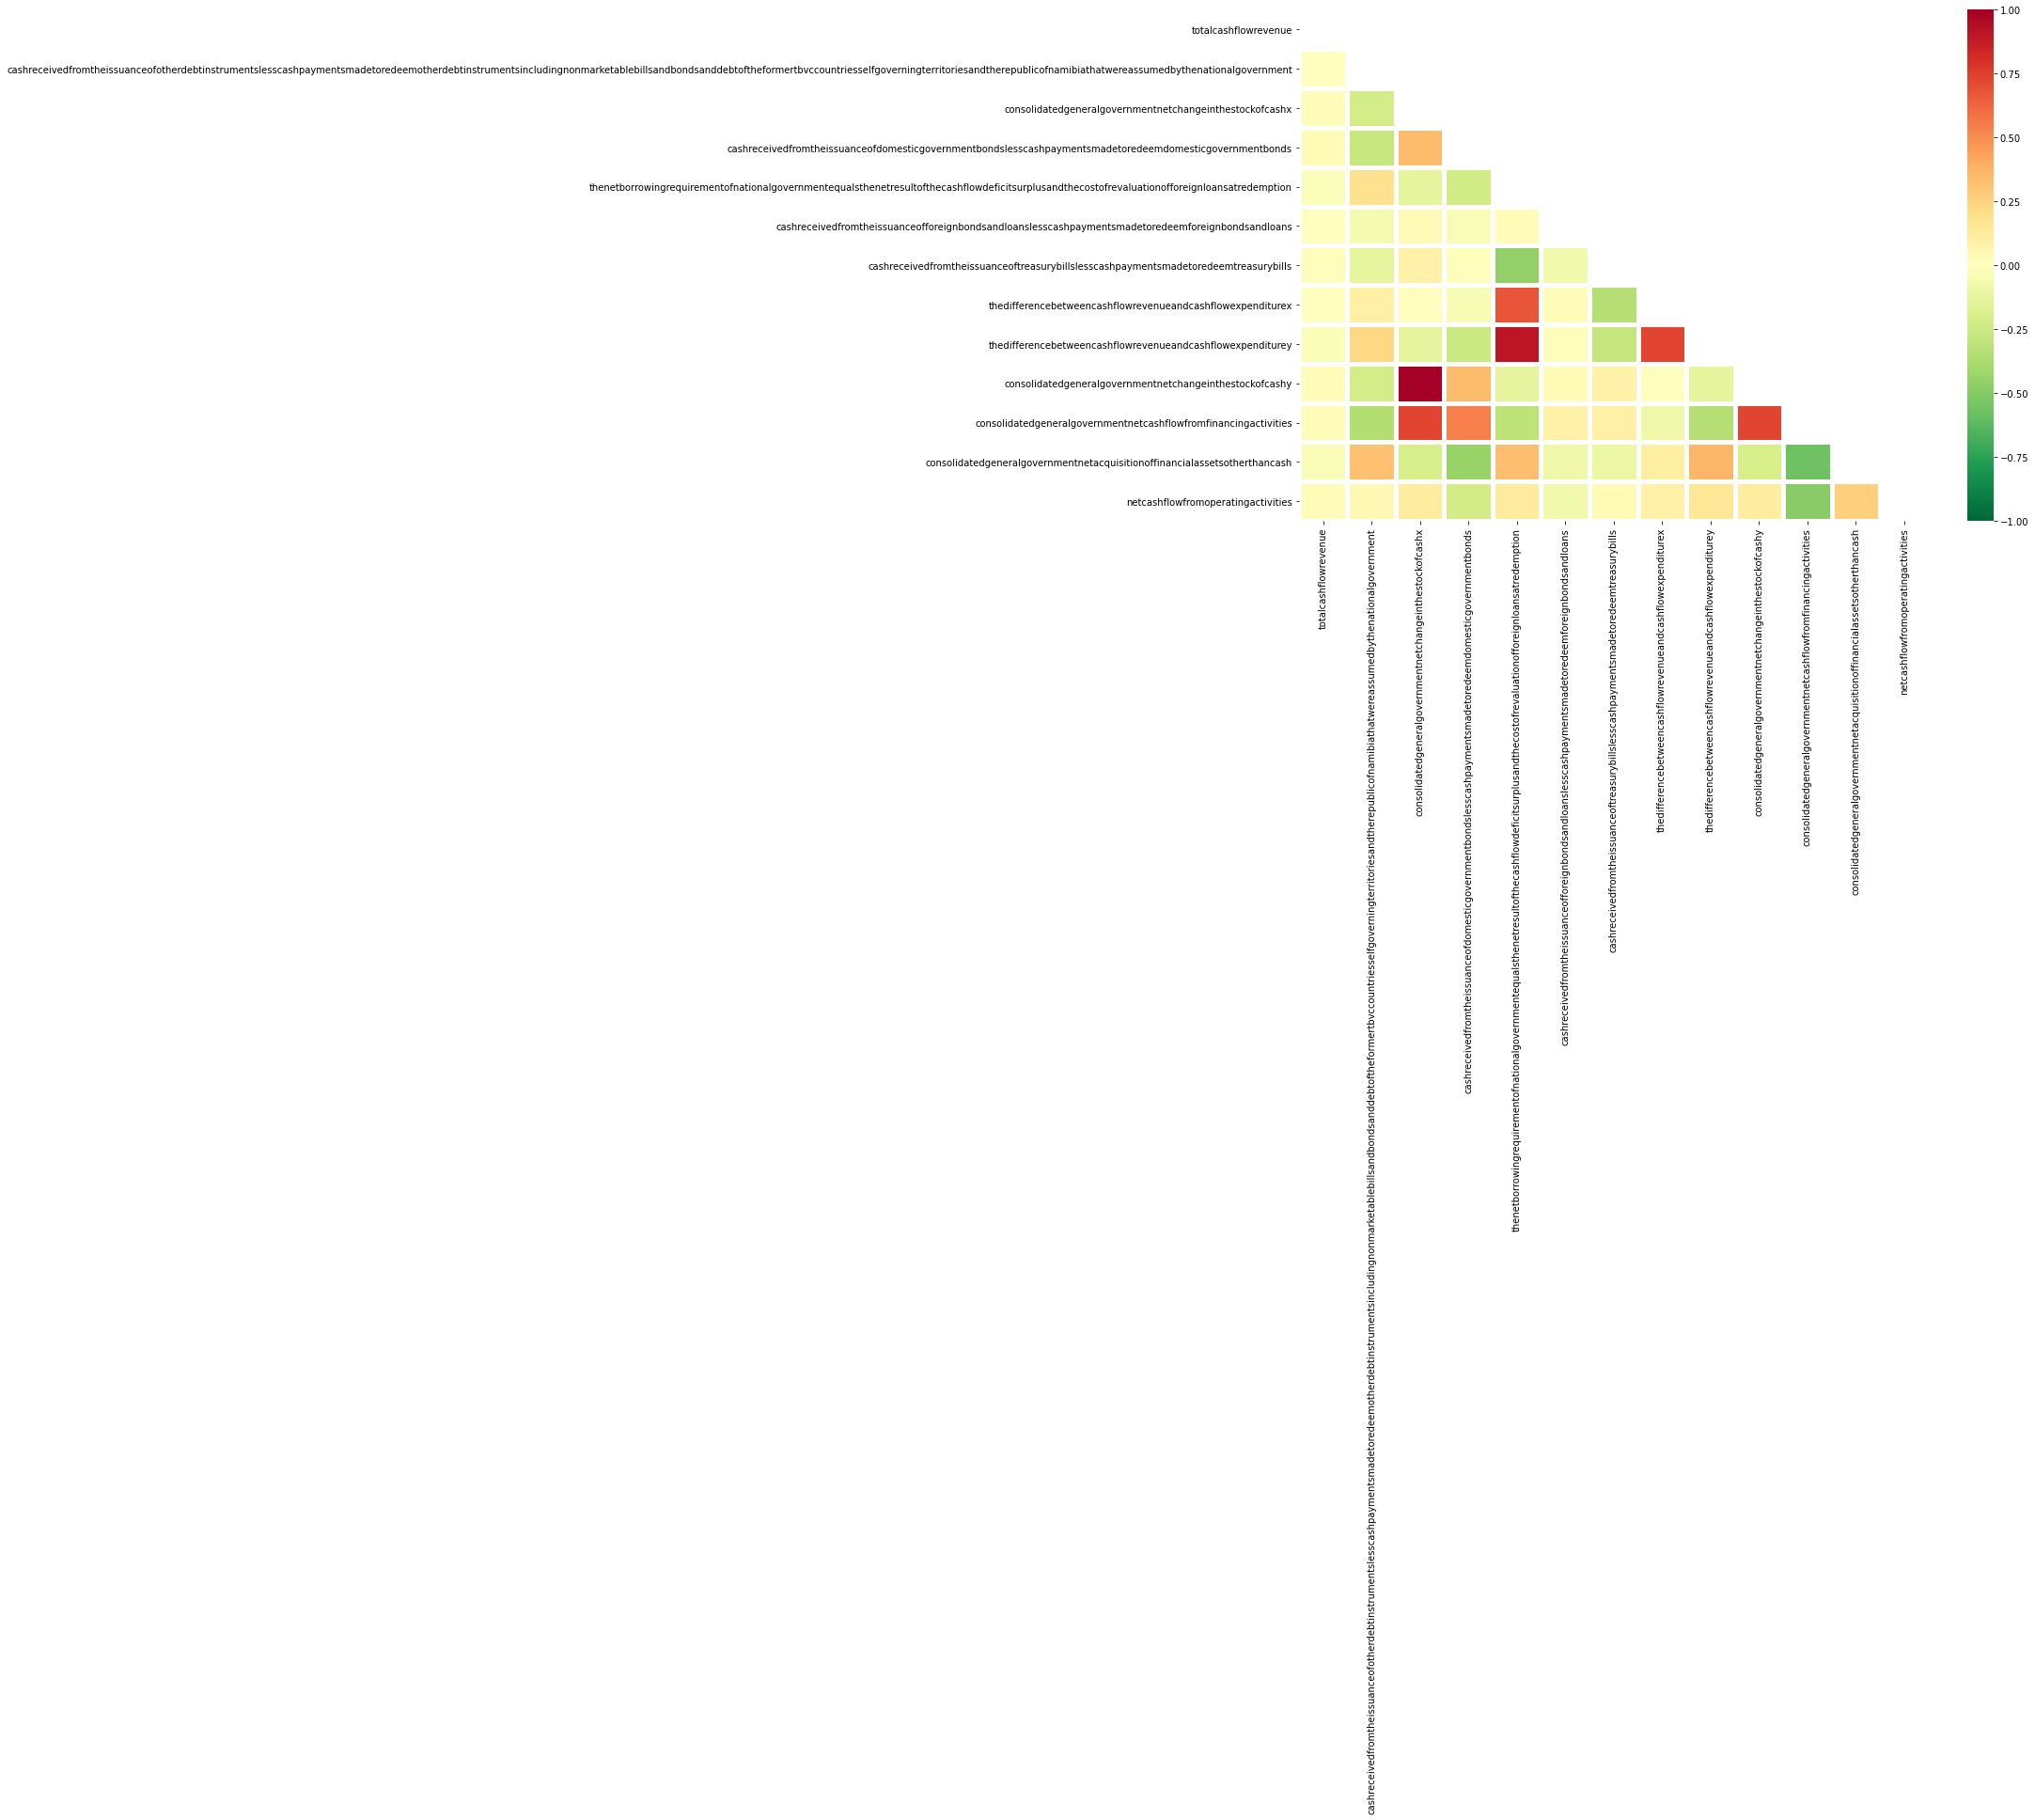

In [42]:
"""
 Below we plot the correlation plot for the asset features
"""


corr_df3 = DF.corr(method='pearson')

fig, ax = plt.subplots(figsize=(15,10))

mask=np.zeros_like(corr_df3)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_df3,cmap='RdYlGn_r',vmax=1.0,vmin=-1.0,mask=mask,linewidths=5,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

### 5.4 QUESTION 4 FEATURES: DEBT AND OUTSTANDING BALANCES


Here we are going to explore features of the fourth perspective to the main question: **How does the government debt affect unemployment rate?**

In [43]:
"Select features about debt and store in a dataframe"


df_new_1 = get_features('debt', 'outstanding')
df_new_1 = pd.DataFrame(df_new_1)
df_new_1 = df_new_1.T

for col in df_new_1.columns:
    new_w = wordopt(col)
    df_new_1.rename(columns= {col: new_w.replace(' ', '')}, inplace = True)

Foreign debt of S.A.: Total foreign debt 
Total outstanding domestic non-marketable bills 
Total gross loan debt (nsa) 
Total outstanding domestic non-marketable bonds
Cash received from the issuance of other debt instruments less cash payments made to redeem other debt instruments, including non-marketable bills and bonds, and debt of the former TBVC-countries, self-governing territories and the Republic of Namibia that were assumed by the national government. 
Total outstanding domestic non-marketable debt
Total outstanding domestic non-marketable debt
Total outstanding domestic marketable loan levies
Total outstanding domestic marketable bonds: Not exceeding 1 year (incl SA housing trust loans i.e marketable SP05 bonds)
Total outstanding domestic marketable bonds: Exceeding 1 but not 3 years
Total outstanding domestic marketable bonds: Total exceeding 10 years
Total outstanding domestic marketable debt 
Total outstanding domestic marketable debt 
Total outstanding domestic marketabl

#### Summary statistics
The mean is slightly greater than the median in this case. These observations indicate that there are slighly more outliers in these variables.

In [44]:
df_new_1.describe()

,foreigndebtofsatotalforeigndebt,totaloutstandingdomesticnonmarketablebills,totalgrossloandebtnsa,totaloutstandingdomesticnonmarketablebonds,cashreceivedfromtheissuanceofotherdebtinstrumentslesscashpaymentsmadetoredeemotherdebtinstrumentsincludingnonmarketablebillsandbondsanddebtoftheformertbvccountriesselfgoverningterritoriesandtherepublicofnamibiathatwereassumedbythenationalgovernment,totaloutstandingdomesticnonmarketabledebt,totaloutstandingdomesticnonmarketabledebt,totaloutstandingdomesticmarketableloanlevies,totaloutstandingdomesticmarketablebondsnotexceedingyearinclsahousingtrustloansiemarketablebonds,totaloutstandingdomesticmarketablebondsexceedingbutnotyears,...,totaloutstandingdomesticmarketablebondsmediumterm,totalforeigndebt,totalforeignmarketabledebt,totaloutstandingdomesticmarketablebills,totaloutstandingforeignmarketablebondsbyunexpiredmaturityexceedingbutnotyears,totaloutstandingforeignmarketablebondsbyunexpiredmaturitynotexceedingyear,totaloutstandingdomesticnonmarketableloanlevies,totalotherdebt,totalforeignnonmarketabledebt,totaloutstandingforeignmarketablebondsbyunexpiredmaturityexceedingyears
count,416.000000,416.000000,4.160000e+02,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,...,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,108091.522675,12868.581731,9.533054e+05,4297.776442,-486.233173,17145.098558,17145.098558,17.067308,22587.786058,60844.350962,...,262132.016827,96714.579327,84254.341346,99330.055288,10721.675481,4614.783654,1.656250,1544.807692,12460.298077,68730.548077
std,36814.096260,17180.947919,7.869633e+05,4812.790420,1350.983044,21213.619236,21213.619236,108.880637,13228.777637,30449.324943,...,148134.042581,77825.124185,78085.733522,99814.026349,11956.440646,6994.242658,1.492022,3498.811591,9360.516019,64676.939885
min,33262.000000,1.000000,1.771990e+05,0.000000,-5430.000000,3.000000,3.000000,0.000000,0.000000,14930.000000,...,39396.000000,5032.000000,1890.000000,6081.000000,0.000000,0.000000,0.000000,0.000000,240.000000,61.000000
25%,82893.000000,1518.250000,3.912242e+05,51.000000,-793.500000,2360.000000,2360.000000,0.000000,12941.000000,32016.000000,...,139721.250000,28054.000000,26367.750000,19600.000000,1983.000000,0.000000,0.000000,46.000000,3561.000000,24665.000000
50%,106159.402985,3973.500000,5.632890e+05,1382.000000,-22.000000,4531.000000,4531.000000,0.000000,21505.500000,57457.000000,...,202041.500000,83080.000000,57970.500000,42299.000000,7555.000000,1962.500000,3.000000,279.500000,12075.000000,48002.000000
75%,136516.000000,19142.500000,1.394451e+06,9570.000000,0.000000,29260.750000,29260.750000,0.000000,28830.000000,84847.500000,...,400360.000000,123450.000000,105315.000000,174454.000000,12306.500000,6243.000000,3.000000,720.000000,20066.500000,81187.000000
max,183311.000000,84061.000000,3.158850e+06,12618.000000,14045.000000,95720.000000,95720.000000,710.000000,80064.000000,136658.000000,...,608517.000000,354481.000000,353133.000000,363870.000000,58244.000000,48779.000000,3.000000,13893.000000,32181.000000,297251.000000


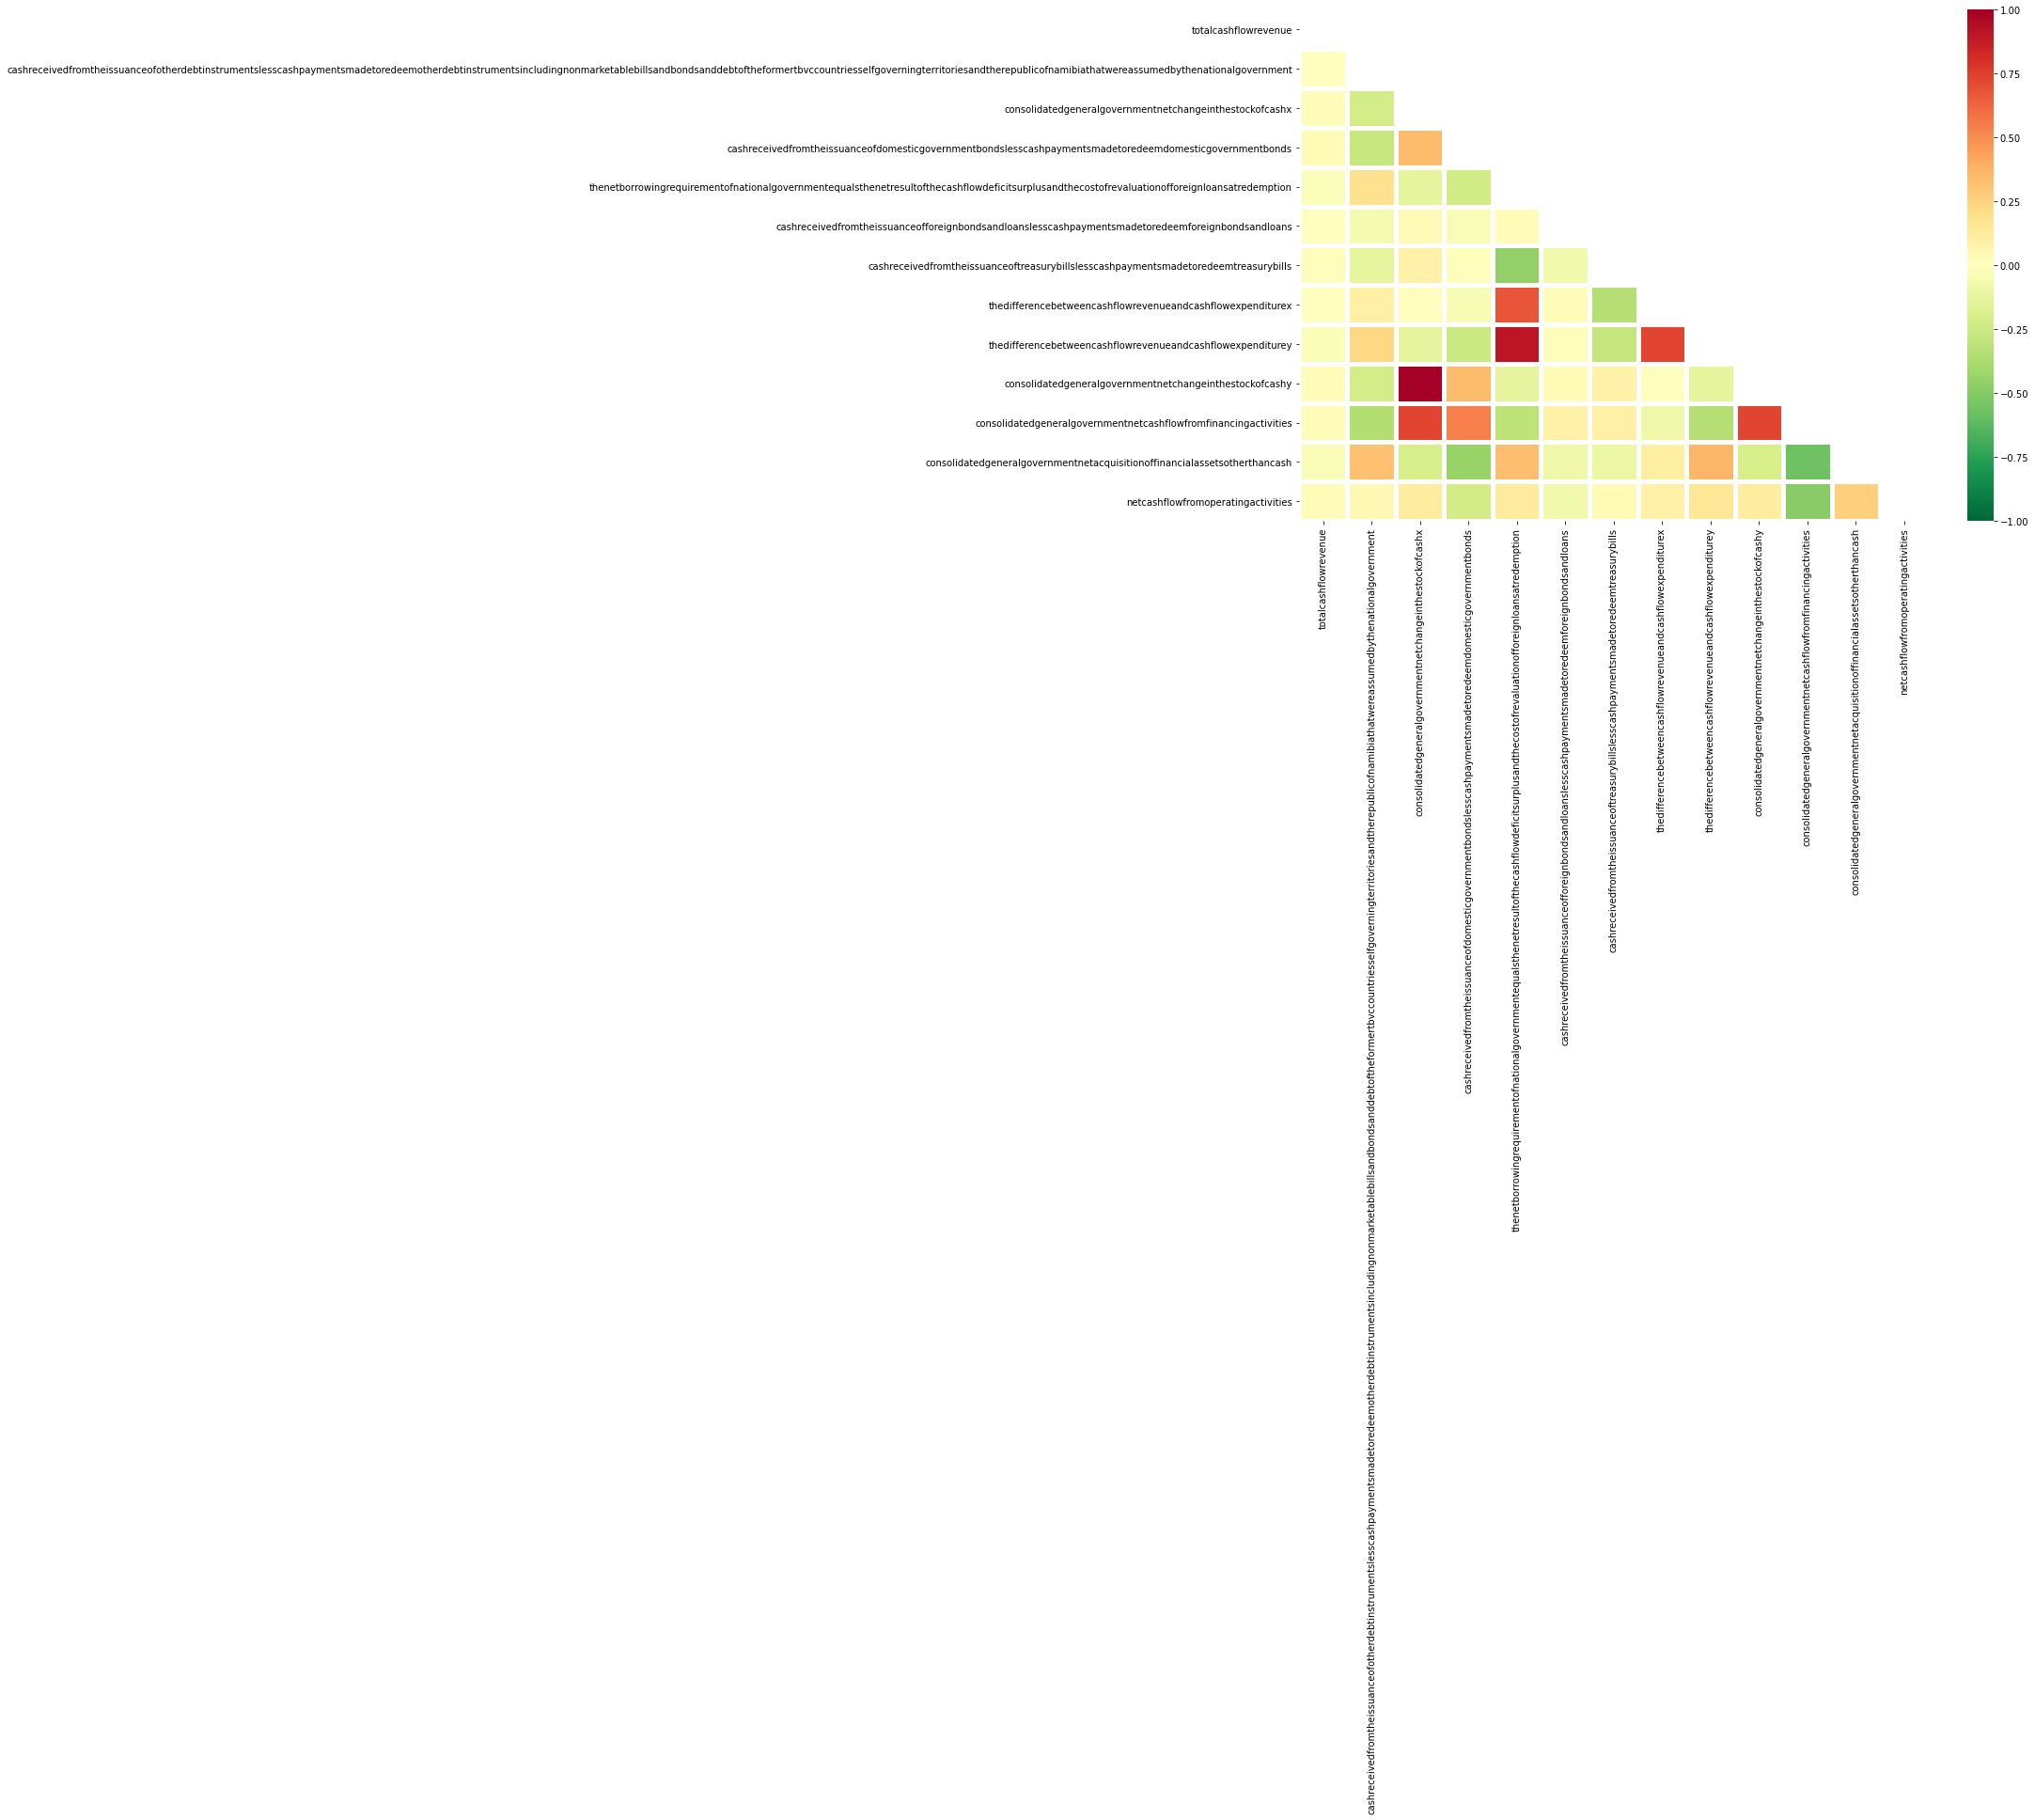

In [45]:
"""
 Below we plot the correlation plot for the asset features
"""


corr_df3 = DF.corr(method='pearson')

fig, ax = plt.subplots(figsize=(15,10))

mask=np.zeros_like(corr_df3)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_df3,cmap='RdYlGn_r',vmax=1.0,vmin=-1.0,mask=mask,linewidths=5,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [46]:
#sns.heatmap(df_new_1.corr())

# 6. Model fitting: Unemployment rate in SA

## How does different economic factors affect Unemployment rate ?

The purpose of this notebook is to explore variables that could potetially have a relationship with our response variables, i.e unemployment rate.
<br>
<br>
We will first start of by exploring which varibles have a relationship with the unemployment rate then after use those variables to answer the following questions:
<br>
<br>
**Questions:**<br>
1. How does the government cash flow affect unemployment rate?
2. Do investment returns affect the employment rate?
3. How does the government assets affect unemployment rate?
4. How does the government debt affect unemployment rate?
<br>
<br>
We will explore this relationship using the regression slope test that has a regression line of the format:
<br>
$$
Y=\beta_{i} X \ for \ i = 0,1,2...m
$$
Where $X$ are the selected variables and $\beta_{i}$ are the respective coefficients.Thus, the **hypothesis** is as follows:
$$
\begin{array}{l}{\mathrm{H}_{\mathrm{0}} : \beta_{0}=\beta_{1}=...=\beta_{m}=0} \\ {\mathrm{H}_{\mathrm{1}} : \beta_{i} \neq 0 } \ for \ at \ least\ one \ i\end{array}
$$

<br>
<br>
We will be using the $F$-test to simultaneously check the significance of a number of regression coefficients.

##  6.1 How does the government assets affect unemployment rate?

###  Helper functions

We exercise further feature selection by using a recursive feature elimination method provided by sklearn to select the most relevant investment features. Fewer features can help our algorithm run more efficiently. It selects important features by using a given algorithm (Linear Regression) and figuring which features produce accurate results.

In [47]:
def model_fit(X,y):
    
    """Linear model designed by forward selection.

    Parameters:
    -----------
    X: pandas DataFrame with all possible predictors and response

    y: decimal values, containing target variable

    Returns:
    --------
    score_list: a list containing the R2 coefficients of determining statistical 
    measure of how well the regression predictions approximate the real data points
           
    optimum_no_features: Variables with the optimum features
    
    """
    
    #no of features
    feature_list=np.arange(1, len(X.columns))            
    high_score=0
    #Variable to store the optimum features
    optimum_no_featurcashes=0           
    score_list =[]
    for n in range(len(feature_list)):
        model = LinearRegression()
        rfe = RFE(model,feature_list[n])
        X_train_rfe = rfe.fit_transform(X,y)
        model.fit(X_train_rfe,y)
        # R2 score for measurement
        score = r2_score(y, model.predict(X_train_rfe))
        score_list.append(score)
        
        if n % 10 == 0:
            print(n,score)
            
        if(score>high_score):
            high_score = score  
            optimum_no_features = feature_list[n]
    return score_list, optimum_no_features 

A function for R squared coefficient line graph plot

In [48]:
  """.

    Parameters:
    -----------
    values: list,R squared coefficient values
    title : string, title of the R squared coefficient plot 
    x_label: string, x-axis label
    y_label : string, y-axis label
    
    """

def plt_plot(values,title, x_label, y_label):
    
    plt.plot(values)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

In [49]:
   """Linear model designed by forward selection.

    Parameters:
    -----------
    optimum_no_features: pandas DataFrame with all possible predictors and response

    X_train: decimal values, containing target variable for training
    y_train: response feature for training
    
    Returns:
    --------
    score_list: a list containing the R2 coefficients of determining statistical 
    measure of how well the regression predictions approximate the real data points
          
    optimum_no_features: Variables with the optimum features
    
    """



def final_model(optimum_no_features, X_train, y_train,cols):
    model = LinearRegression()
    #Initializing RFE model
    rfe = RFE(model, optimum_no_features)             
    #Transforming data using RFE
    x_fitted = rfe.fit_transform(X_train,y_train)  
    #Fitting the data to model
    model.fit(x_fitted,y_train)              
    temp = pd.Series(rfe.support_,index = cols)
    selected_features = temp[temp==True].index
    return selected_features, model, rfe

This function calculates the p value for testing features and prints Standard Erros, t values, and p values

In [50]:
def print_p_values(x_test, y_test, predicted, params):
    """
    Calculates the p value, based on https://stackoverflow.com/a/42677750/9260653
    """
    newX = np.append(np.ones((len(x_test),1)), x_test, axis=1)
    MSE = (sum((y_test.values-predicted)**2))/(len(newX)-len(newX[0]))

    var_b = MSE*(np.linalg.pinv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)[:-1]
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4)

    myDF3 = pd.DataFrame()
    myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["P-Values"] = [params,sd_b,ts_b,p_values]
    print(myDF3.iloc[1])

From exploratory analysis it appears most of the assets are positively correlated with unemployment rate, however, there is also strong correlation between some assets which may lead to problem of colinearity

#### Here I am separating features from the target variable

In [51]:
X= df_assets2
df2 = y_values_ffill.rename(columns={'unemployment rate':'unemployment_rate'})

y = df2['unemployment_rate']

Earlier on, we saw that some of our fetaures we strongly correlated that could cause issue of multicollinearity, to resolve that, I shall optimize my feature space by removing features with correlation more than 0.8 .

In [52]:
correlated_features = set()
correlation_matrix = X.corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
len(correlated_features)


7

In [53]:
print(correlated_features)

{'ForeignAssetsPortfolioInvestmentDebtSecurities', 'ForeignAssetsTotalDirectInvestment', 'TotalForeignAssetsMinusTotalForeignLiabilities', 'ConsolidatedGeneralGovernmentNonfinancialAssetsNet', 'ForeignAssetsPortfolioInvestmentEquitySecurities', 'ForeignAssetsTotalPortfolioInvestment', 'TotalForeignAssets'}


In [54]:
X.drop(labels=correlated_features, axis=1, inplace=True)
X.shape

(416, 9)

Having obtained the optimized features, below we select them and in our new dataset and plot the correlation matrix.

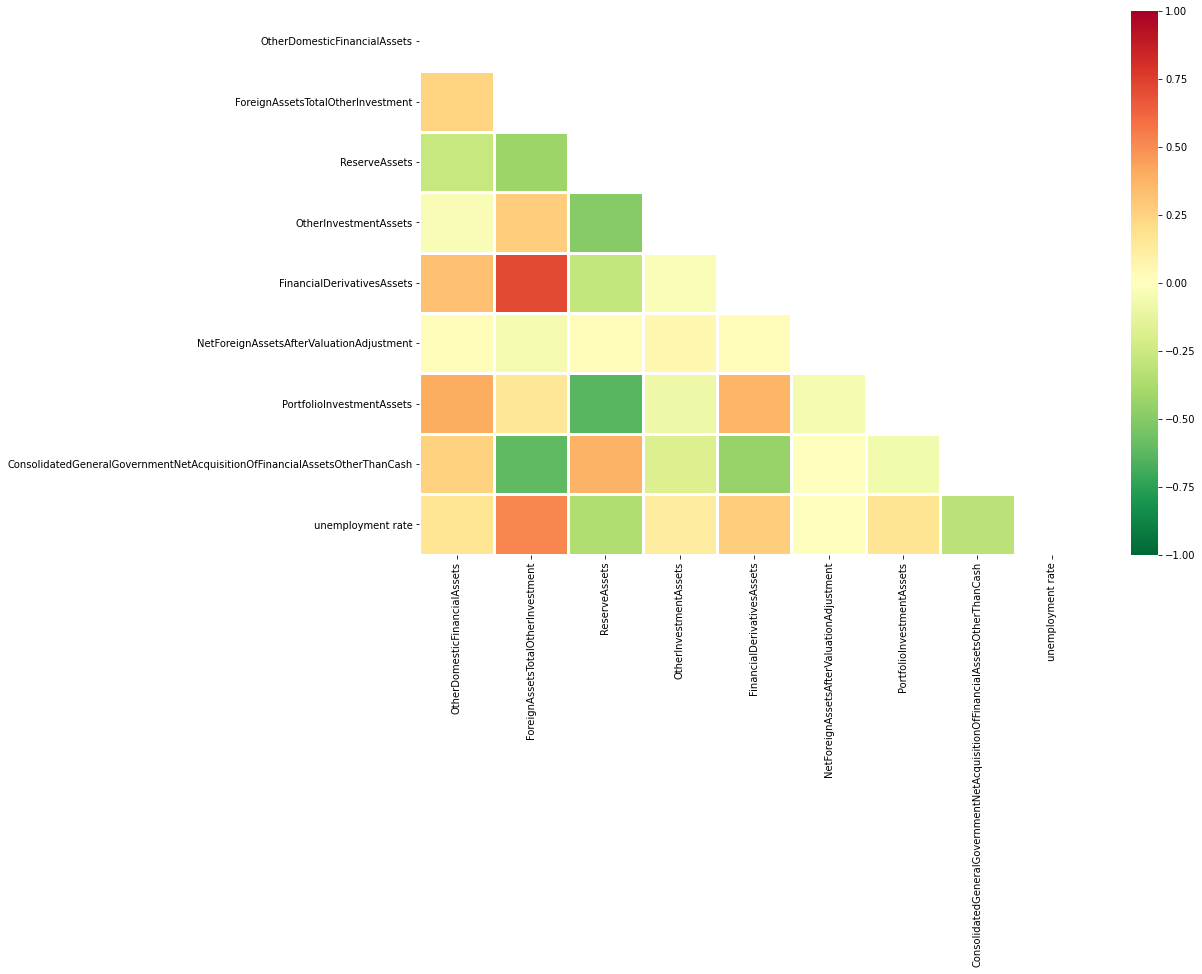

In [55]:
corr_df = X.corr(method='pearson')

fig, ax = plt.subplots(figsize=(15,10))


mask=np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_df,cmap='RdYlGn_r',vmax=1.0,vmin=-1.0,mask=mask,linewidths=2.5,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## Partitioning the Data into Training(70%) and Testing(30%) sets


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [57]:
X_train.head()

,OtherDomesticFinancialAssets,ForeignAssetsTotalOtherInvestment,ReserveAssets,OtherInvestmentAssets,FinancialDerivativesAssets,NetForeignAssetsAfterValuationAdjustment,PortfolioInvestmentAssets,ConsolidatedGeneralGovernmentNetAcquisitionOfFinancialAssetsOtherThanCash,unemployment rate
Date,,,,,,,,,
2012-05-01,15110.000000,320.0,-349.0,11967.0,62043.0,60028.0,-21433.0,-13588.0,25.0000
2000-01-01,-6629.442857,47.0,-3136.0,-10254.0,0.0,984.0,-7625.0,9.0,25.6997
2017-08-01,-11895.000000,530.0,-14902.0,-881.0,40936.0,11658.0,-14895.0,-15429.0,27.7000
1999-06-01,-6629.442857,47.0,-3136.0,-10254.0,0.0,-3245.0,-7625.0,9.0,24.9541
2008-06-01,2921.000000,303.0,-5830.0,64271.0,0.0,19921.0,-51058.0,-8841.0,22.6000


## Modelling phase

### The following function applies step wise linear regression fit to our model

In [58]:
scores_list, optimum_no_features = model_fit(X_train,y_train)
print(optimum_no_features)

0 1.0
1


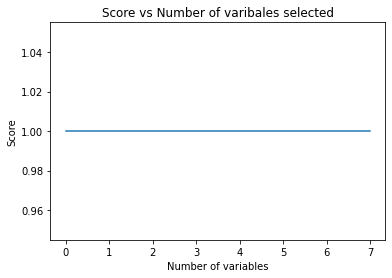

In [59]:
plt_plot(scores_list, 'Score vs Number of varibales selected','Number of variables', 'Score')

### Final model which utilizes optimum number of features, which were returned by the above function

In [60]:
cols_assets = list(X.columns)

selected_features, model, rfe = final_model(optimum_no_features, X_train, y_train,cols_assets)
print(selected_features)

Index(['unemployment rate'], dtype='object')


From our stepwise linear regression we have ended with 5 features only 1 redundant one was removed

Now model prediction

In [61]:
y_train_predicted = model.predict(rfe.transform((X_train)))

### Model Analysis


## Post-Stepwise Regression


### Residual analysis


In [62]:
residuals =y_train.astype(float)- (y_train_predicted)

<AxesSubplot:xlabel='unemployment_rate'>

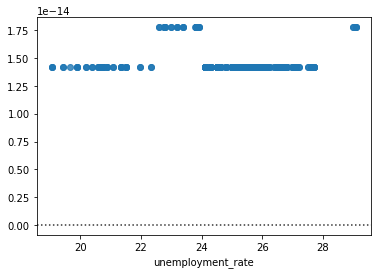

In [63]:
sns.residplot(y_train.astype(float),y_train_predicted)

In [64]:
import statsmodels.formula.api as sm

In [65]:
formula_features = ' + '.join(list(selected_features))
formula = 'unemployment_rate~'+ formula_features
formula

'unemployment_rate~unemployment rate'

In [66]:
# Add y back to df

X_y_new_train = pd.concat([X_train,pd.DataFrame(y_train)], axis=1)

In [67]:
X_train_y_target = pd.concat([X_train, pd.DataFrame(y_train)], axis=1)
X_train_y_target.head()

,OtherDomesticFinancialAssets,ForeignAssetsTotalOtherInvestment,ReserveAssets,OtherInvestmentAssets,FinancialDerivativesAssets,NetForeignAssetsAfterValuationAdjustment,PortfolioInvestmentAssets,ConsolidatedGeneralGovernmentNetAcquisitionOfFinancialAssetsOtherThanCash,unemployment rate,unemployment_rate
Date,,,,,,,,,,
2012-05-01,15110.000000,320.0,-349.0,11967.0,62043.0,60028.0,-21433.0,-13588.0,25.0000,25.0000
2000-01-01,-6629.442857,47.0,-3136.0,-10254.0,0.0,984.0,-7625.0,9.0,25.6997,25.6997
2017-08-01,-11895.000000,530.0,-14902.0,-881.0,40936.0,11658.0,-14895.0,-15429.0,27.7000,27.7000
1999-06-01,-6629.442857,47.0,-3136.0,-10254.0,0.0,-3245.0,-7625.0,9.0,24.9541,24.9541
2008-06-01,2921.000000,303.0,-5830.0,64271.0,0.0,19921.0,-51058.0,-8841.0,22.6000,22.6000


In [68]:
results = sm.ols(formula=formula,data = X_train_y_target).fit()
import statsmodels.graphics as smgraphics

axss = smgraphics.regressionplots.plot_fit(results, 2)
_ = smgraphics.regressionplots.plot_fit(results, 1)
_ = smgraphics.regressionplots.plot_fit(results, 3)
_ = smgraphics.regressionplots.plot_fit(results, 4)
_ = smgraphics.regressionplots.plot_fit(results, 5)

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
Y_ols_pred=results.predict(X_train)

In [ ]:
residuals = y_train - Y_ols_pred


In [ ]:
pred_val = results.fittedvalues.copy()
fig, ax = plt.subplots(figsize=(6,2.5))


_ = ax.scatter(pred_val, residuals)

In [ ]:
fig, ax1 = plt.subplots(figsize=(6,2.5))
_ = ax1.scatter(X_train.iloc[:,2:3], residuals)

#### Error distribution of residuals

In [ ]:
sns.distplot(residuals)

#### QQ plots of sample quantiles vs theoretical ones

In [ ]:
import statsmodels.api as sm
_ = sm.qqplot(residuals)

### Outlier removal


In [ ]:
test = results.outlier_test()
outliers = ((x[i],y[i]) for i,t in enumerate(test) if t[2] < 0.5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)


In [ ]:
outliers =(i for i,t in enumerate(test.iloc[:,2]) if t < 0.5)

In [ ]:
# Index of Outliers
outliers_list = list(outliers)

In [ ]:
# Remove outliers
X_train = pd.DataFrame(np.delete(X_train.values, outliers_list,0))
y_train = pd.DataFrame(np.delete(y_train.values, outliers_list,0))
len(X_train)

## Final Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

final_model = rlm(formula, data=X_train_y_target,
                      M=sm.robust.norms.HuberT()).fit()

In [ ]:
X_train.head()

In [ ]:
final_model_predicted = final_model.predict(X_test)

In [ ]:
params = np.array(final_model.params)

In [ ]:
metrics.r2_score(y_test, final_model_predicted)

In [ ]:
print_p_values(X_test, y_test, final_model_predicted, params)


## Hypothesis Testing

The test for $H_{0}$ by using the following statistic:
$$
F_{0} = \frac{MS_R}{MS_E}
$$
where $MS_R$ is the regression mean square and $MS_E$ is the error mean square.
<br>
The null hypothesis, $H_{0}$, is rejected if the calculated statistic. $f_{0}, is usch that$
$$
F_{0} > f
$$
I will now test my hypothesist using $F$

In [ ]:
def fstat_test(final_model):
    A = np.identity(len(final_model.params))
    A = A[1:,:]
    fvalue = final_model.f_test(A).fvalue
    print("The fvalue is " + str(fvalue[0][0]))

In [ ]:
fstat_test(final_model)

In [ ]:
degresOfFreedom = len(X_train) - (len(X_train.columns)+1)
scipy.stats.f.ppf(q=1-0.05, dfn=2, dfd=degresOfFreedom)

## Interpreting Results

As shown above, $F_{0} = 110.5337$ and $f = 3.0121$.
<br>
<br>
Since $F_0$ > $f$, $H_{0}$ is rejected and it is concluded that at least one $\beta_{i}$ cofficient is significant. In other words, it is concluded that a regression model exists between the exploratory and response variables

# 6.2 Unemployement rate in SA: Investigating the relationship between governments profits/losses on investments and unemployment rate in South Africa

###  Do investment returns affect the employment rate?

We are going to removr investment features with correlation scores of over 70 percent

In [ ]:
correlated_features = set()
correlation_matrix = X_INV.corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
len(correlated_features)

In [ ]:
X_INV.drop(labels=correlated_features, axis=1, inplace=True)
X_INV.shape

In [ ]:

X_train_inv, X_test_inv, y_train_inv, y_test_inv = train_test_split(X_INV,y_inv, test_size = 0.3, random_state = 0)
X_train_inv.head()

In [ ]:
def invest_model_fit(X_fit,y_fit):    
    feature_list=np.arange(1, len(X_train_inv.columns))            
    high_score=0
    optimum_no_features=0           
    score_list =[]
    for n in range(len(feature_list)):
        model = LinearRegression()
        rfe = RFE(model,feature_list[n])
        X_train_rfe = rfe.fit_transform(X_train_inv,y_train_inv)
        model.fit(X_train_rfe,y_train_inv)

        score = r2_score(y_fit, model.predict(X_train_rfe))
        score_list.append(score)

        if(score>high_score):
            high_score = score  
            optimum_no_features = feature_list[n]
    return score_list, optimum_no_features 


In [ ]:
scores_list_inv, optimum_no_features_inv = invest_model_fit(X_train_inv,y_train_inv)
print("Number of features selected:",optimum_no_features_inv)

In [ ]:
plt_plot(scores_list, 'Score vs Number of varibales selected','Number of variables', 'Score')

The r squared scores seem to be increasing for the selected investment features. The scores remain less that 0.4 probably because of the small number of features used

In [ ]:
def final_inv_model(n, X_final_inv, y_final_inv):
    cols = list(X_INV.columns)
    model = LinearRegression()
    #Initializing RFE model
    rfe = RFE(model, n)             
    #Transforming data using RFE
    x_fitted = rfe.fit_transform(X_final_inv,y_final_inv)  
    #Fitting the data to model
    model.fit(x_fitted,y_final_inv)              
    temp = pd.Series(rfe.support_,index = cols)
    selected_features = temp[temp==True].index
    return selected_features, model, rfe

In [ ]:
print(optimum_no_features_inv)
selected_inv_features, inv_model, inv_rfe = final_inv_model(optimum_no_features_inv, X_train_inv, y_train_inv)
selected_inv_features.tolist()

In [ ]:
y_train_inv_predicted = inv_model.predict(inv_rfe.transform((X_train_inv)))

## Residual Analysis

In [ ]:
inv_residuals =y_train_inv.astype(float)- (y_train_inv_predicted)
sns.residplot(y_train_inv.astype(float),y_train_inv_predicted)

The residual points are not evenly dustributed vertically. The predictions get worse as the unemployment rate increases. The residuals show heteroscedasticity pattern which happens when regression assumes that the residuals come data with constant variance. This resuslts in low confidence in the model.

In [ ]:
import statsmodels.api as sm
_ = sm.qqplot(inv_residuals)

In [ ]:
sns.distplot(inv_residuals)

The residuals are not normally distributed

In [ ]:
formula_inv_features = ' + '.join(list(selected_inv_features))
formula_inv = 'unemployment_rate~'+ formula_inv_features

In [ ]:
X_y_new_inv_train = pd.concat([X_train_inv,pd.DataFrame(y_train_inv)], axis=1)

In [ ]:
X_train_y_target_INV = pd.concat([X_train_inv, pd.DataFrame(y_train_inv)], axis=1)

In [ ]:
import statsmodels.formula.api as sm
results = sm.ols(formula=formula_inv,data = X_train_y_target_INV).fit()
import statsmodels.graphics as smgraphics

axss = smgraphics.regressionplots.plot_fit(results, 1)
_ = smgraphics.regressionplots.plot_fit(results, 2)

# Final Investment Model

In [ ]:
import statsmodels.api as sm
final_inv_model = rlm(formula_inv, data=X_train_y_target_INV,
                      M=sm.robust.norms.HuberT()).fit()

In [ ]:
final_inv_model_predicted = final_inv_model.predict(X_test_inv)
inv_params = np.array(final_inv_model.params)
print(inv_params.shape)
print(X_test_inv.shape)
metrics.r2_score(y_test_inv, final_inv_model_predicted)

In [ ]:
def print_p_values_inv(x_test, y_test, predicted, params):
    """
    Calculates the p value, based on https://stackoverflow.com/a/42677750/9260653
    """
    newX = np.append(np.ones((len(x_test),1)), x_test, axis=1)
    MSE = (sum((y_test.values-predicted)**2))/(len(newX)-len(newX[0]))

    var_b = MSE*(np.linalg.pinv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)[:-1]
    print(params.shape)
    ts_b = params/ sd_b
    
    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,4)
    params = np.round(params,4)

    myDF3 = pd.DataFrame()
    myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["P-Values"] = [params,sd_b,ts_b,p_values]
    print(myDF3.iloc[1])

In [ ]:
# inv_params.shape
print_p_values_inv(X_test_inv, y_test_inv, final_inv_model_predicted, inv_params)


## Hypothesis Testing

In [69]:
def fstat_test(final_model):
    A = np.identity(len(final_model.params))
    A = A[1:,:]
    fvalue = final_model.f_test(A).fvalue
    print("The f value is " + str(fvalue[0][0]))

In [70]:
fstat_test(final_inv_model)
degresOfFreedom = len(X_train_inv) - (len(X_train_inv.columns)+1)
scipy.stats.f.ppf(q=1-0.05, dfn=2, dfd=degresOfFreedom)

NameError: name 'final_inv_model' is not defined

## Interpreting Results

With a p-value 0f less than 0.01 and f value = 101.95 greater than f = 3.012 showing high significance, we can reject the hypothesis that investment has an effect on unemployment rate.

# 6.3 Unemployement rate in SA: Exploring the multi-variables of cash flow in South Africa that affects the rate of unemployement

### How does the government cash flow affect unemployment rate?

In [ ]:
X_cash = DF # transpose the data to be in a correct form


## Emperical Analysis

In this section I will be analysing the features that are going to be used to model the subsdiary question

In [ ]:
correlation = X_cash.corr()

## Dealing with Collinearity
Below I omitthe offending variables using the dimensionality reduction. This done to avoid collinearity from reducing the precision of the estimated coefficients, which weakens the statistical power of your regression model

In [ ]:
threshhold = 0.5 # the threshhold that is used to select features
correlated_features_cash = set() # a set which stores features that are available after dealing with collinearity
correlation_matrix_cash = X_cash.corr() # getting th correlation of the features

for i in range(len(correlation_matrix_cash.columns)): # loop through the features
    for j in range(i):
        if abs(correlation_matrix_cash.iloc[i, j]) > threshhold: # detecting all features that have correlation less greater than 0.5
            colname = correlation_matrix_cash.columns[i] # selecting features with less correlation
            correlated_features_cash.add(colname) # creating new dataset with no high correlated variables
len(correlated_features_cash) # the remaining features


## Removing spaces from the varibales (Data wrangling maybe???)
This is done to make it easier work with columns name

In [ ]:
for col in X_cash.columns: #selecting the features 
    new_w = wordopt(col) #removing all unnecesary characters
    X_cash.rename(columns= {col: new_w.replace(' ', '')}, inplace = True) # removing spaces from columns names

Y_cash = df2['unemployment_rate'] # removing space from target variblles


### Data splitting

The predefined ratio used for data splitting is 70/30 reason being that I want to improve the accuracy of the evaluation of the model.


In [ ]:
X_train_cash, X_test_cash, y_train_cash, y_test_cash = train_test_split(X_cash,Y_cash, test_size = 0.3, random_state = 0) # splitting datset into 70/30 ratio using sklearn

## Modeling - Stepwise regression

In this section I employ procedures to search through the model space to select a model. In other words,it is an iterative construction procedure of a regression model that involves the selection of independent variables to be used in a final model

In [ ]:
scores_list_cash, optimum_no_features_cash = model_fit(X_train_cash,y_train_cash)

In [ ]:
plt_plot(scores_list_cash, 'Score vs Number of varibales selected','Number of variables', 'Score')

## Forward selection feature selection
This is how the following methods behaves, at first it begins with no variables in the model, tests each variable as it is added to the model, then keeps those that are deemed most statistically significant—repeating the process until the results are optimal

In [ ]:
sns.pairplot(X_cash)# fit final model using optimum number of features from prev function
"""final_model_cash :Linear model designed by forward selection.

    Parameters:
    -----------
    X_train: pandas DataFrame with all the explaratory variables

    y_train: pandas Series, series of response variable

    Returns:
    --------
    selected_features_cash: number of selectedinput features
    
    model: linear regression model
    
    rfe: gives the ranking of all the variables, 1 being most important.
    """

def final_model_cash(optimum_no_features, X_train, y_train):
    cols = list(X_cash.columns)
    model = LinearRegression()
    #Initializing RFE model
    rfe = RFE(model, optimum_no_features)  # RFE method takes the model to be used and the number of required features as input          
    x_fitted = rfe.fit_transform(X_train,y_train)   #Transforming data using RFE
    #Fitting the data to model
    model.fit(x_fitted,y_train)              
    temp = pd.Series(rfe.support_,index = cols)
    selected_features = temp[temp==True].index
    return selected_features, model, rfe

Fitting linear model to select features for the model using forward selection

In [ ]:
selected_features_cash, model_cash, rfe_cash = final_model_cash(optimum_no_features_cash, X_train_cash, y_train_cash)

using training features to predict the model

In [ ]:
y_train_predicted_cash = model_cash.predict(rfe_cash.transform((X_train_cash))) #using training features to predict the model

## Model Fit Analaysis

# Post-Stepwise Regression

## Residual Analysis
Here I use the resudual analysis for validating the regression model. If the dots are randomly dispersed around the horizontal axis then a linear regression model is appropriate for the data.

In [ ]:
residuals = y_train_cash-y_train_predicted_cash # calculating the residual of the  target variable foir training

In [ ]:
sns.residplot(y_train_cash,y_train_predicted_cash) #plotting the residual plot

### applying normal probability plot to assess how the data (error) depart from normality visually:


creating formula of the selected features for linear regression model

In [ ]:
# creating formula of the selected features for linear regression model
formula_features_cash = ' + '.join(list(selected_features_cash)) # selected features formula
formula_cash = 'unemployment_rate~'+ formula_features_cash # target feature formula

In [ ]:
# Add y back to df
X_y_new_train_cash = pd.concat([X_train_cash,pd.DataFrame(y_train_cash)], axis=1)


In [ ]:
X_train_y_target_cash = pd.concat([X_train_cash, pd.DataFrame(y_train_cash)], axis=1)
# X_train_y_target

Here I plot the model for the features selected above

In [ ]:
import statsmodels.graphics as smgraphics
import statsmodels.formula.api as sm

results_cash = sm.ols(formula=formula_cash,data = X_train_y_target_cash).fit() # fitting linear regression
axss_cash = smgraphics.regressionplots.plot_fit(results_cash,3) # plotting regression plot for feature 3


The above plot regression plot of feature 3, **consolodated general government change in the stock cach**

In [ ]:
Y_ols_pred_cash=results_cash.predict(X_train_cash)

In [ ]:
residuals_cash = y_train_cash - Y_ols_pred_cash


In [ ]:
fig, ax1 = plt.subplots(figsize=(6,2.5))
_ = ax1.scatter(X_train_cash.iloc[:,5:6], residuals_cash)

In [ ]:
sns.distplot(residuals)

In [ ]:
import statsmodels.api as sm
_ = sm.qqplot(residuals_cash)

### Outlier Detection and removal
Here outliers are detected and deleted and used the remaining observations for fitting the model.

In [ ]:
test_cash = results.outlier_test()
outliers_cash = ((x[i],y[i]) for i,t in enumerate(test) if t[2] < 0.5)

In [ ]:
X_train_cash, X_test_cash, y_train_cash, y_test_cash = train_test_split(X_cash,Y_cash, test_size = 0.3, random_state = 0)


In [ ]:
outliers_cash =(i for i,t in enumerate(test.iloc[:,2]) if t < 0.5)

In [ ]:
# Index of Outliers
outliers_list_cash = list(outliers)


In [ ]:
# Remove outliers
X_train_cash = pd.DataFrame(np.delete(X_train_cash.values, outliers_list_cash,0))
y_train_cash = pd.DataFrame(np.delete(y_train_cash.values, outliers_list_cash,0))


## Final Model


In [ ]:
X_train_cash, X_test_cash, y_train_cash, y_test_cash = train_test_split(X_cash,Y_cash, test_size = 0.3, random_state = 0)

final_model_cash = rlm(formula_cash, data=X_train_y_target_cash,
                      M=sm.robust.norms.HuberT()).fit()

In [ ]:
final_model_predicted_cash = final_model_cash.predict(X_test_cash)

In [ ]:
params_cash = np.array(final_model_cash.params)

In [ ]:
metrics.r2_score(y_test, final_model_predicted)

In [ ]:
print_p_values(X_test_cash, y_test_cash, final_model_predicted_cash, params_cash)


## Hypothesis Testing

he test for $H_{0}$ byusing the following statistic:
$$
F_{0} = \frac{MS_R}{MS_E}
$$
where $MS_R$ is the regression mean square and $MS_E$ is the error mean square.
<br>
The null hypothesis, $H_{0}$, is rejected if the calculated statistic. $f_{0}, is usch that$
$$
F_{0} > f
$$
I will now test my hypothesist using $F$

In [ ]:
def fstat_test(final_model):
    A = np.identity(len(final_model.params))
    A = A[1:,:]
    fvalue = final_model.f_test(A).fvalue
    print("The fvalue is " + str(fvalue[0][0]))

In [ ]:
fstat_test(final_model)

In [ ]:
degresOfFreedom = len(X_train) - (len(X_train.columns)+1)
scipy.stats.f.ppf(q=1-0.05, dfn=2, dfd=degresOfFreedom)

## Interpreting Results

As shown above, $F_{0} = 110.5337$ and $f = 3.004779$.
<br>
<br>
Since $F_0$ > $f$, $H_{0}$ is rejected and it is concluded that at least one $\beta_{i}$ cofficient is significant. In other words, it is concluded that a regression model exists between the exploratory and response variables

# 6.4 Unemployement rate in SA: Exploring the relationship between multiple variables that may influence the unemployment rate of South Africa

### How does the government debt affect unemployment rate?

# Colinearity

In [ ]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

In [ ]:
# removing all the corrated values with a correlation value over 0.7
DF_X = df_new_1.copy()
correlation(DF_X,0.7)

In [ ]:
values = list(DF_X.columns)
keys = list('ABCDEFGH')

zip1 = zip(keys, values)



dictionary = dict(zip1)


print(dictionary)

In [ ]:
DF_X.columns = keys
DF_Y.columns = ['unemployment_rate']

# Modelling
## Stepwise regression

In [ ]:
X_train_debt, X_test_debt, y_train_debt, y_test_debt = train_test_split(DF_X,DF_Y, test_size = 0.3, random_state = 0)

In [ ]:


def final_model_debt(optimum_no_features, X_train, y_train):
    cols = list(DF_X.columns)
    model = LinearRegression()
    #Initializing RFE model
    rfe = RFE(model, optimum_no_features)             
    #Transforming data using RFE
    x_fitted = rfe.fit_transform(X_train,y_train)  
    #Fitting the data to model
    model.fit(x_fitted,y_train)              
    temp = pd.Series(rfe.support_,index = cols)
    selected_features = temp[temp==True].index
    return selected_features, model, rfe

In [ ]:
# Train model using X_train, y_train
X_train_debt
scores_list_debt, optimum_no_features_debt = model_fit(X_train_debt,y_train_debt)

In [ ]:
plt_plot(scores_list_debt, 'Score vs Number of varibales selected','Number of variables', 'Score')

In [ ]:
selected_features_debt, model_debt, rfe_debt = final_model_debt(optimum_no_features_debt, X_train_debt, y_train_debt)

In [ ]:
y_train_predicted_debt = model_debt.predict(rfe_debt.transform((X_train_debt)))


## Model Fit Analaysis

# Post-Stepwise Regression

## Residual Analysis


In [ ]:
residuals_debt = y_train_debt-y_train_predicted_debt
residuals_debt.head()

In [ ]:
ax = sns.residplot(y_train_debt,y_train_predicted_debt)

In [ ]:
### We can apply normal probability plot to assess how the data (error) depart from normality visually:

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
formula_features_debt = ' + '.join(list(selected_features_debt))
formula_debt = 'unemployment_rate~'+ formula_features_debt

In [ ]:
# Add y back to df

X_y_new_train_debt = pd.concat([X_train_debt, y_train_debt], axis=1)

In [ ]:
X_train_y_target_debt = pd.concat([X_train_debt, y_train_debt], axis=1)

In [ ]:
results_debt = sm.ols(formula=formula_debt,data = X_train_y_target_debt).fit()
import statsmodels.graphics as smgraphics

axss = smgraphics.regressionplots.plot_fit(results_debt, 1)
_ = smgraphics.regressionplots.plot_fit(results_debt,5)


In [ ]:
Y_ols_pred_debt=results_debt.predict(X_train_debt)
Y_ols_pred_debt = pd.DataFrame(Y_ols_pred_debt)
Y_ols_pred_debt.columns = ['unemployment_rate']

In [ ]:
pred_val_debt = results_debt.fittedvalues.copy()
fig, ax = plt.subplots(figsize=(6,2.5))

residuals.shape
_ = ax.scatter(pred_val_debt, residuals_debt)

In [ ]:
fig, ax1 = plt.subplots(figsize=(6,2.5))
_ = ax1.scatter(X_train_debt.iloc[:,5:6], residuals_debt)

In [ ]:
# Plot shows that the residuals are normally distributed
sns.distplot(residuals)

In [ ]:
import statsmodels.api as sm
_ = sm.qqplot(residuals)

### Outlier Detection and removal

In [ ]:
test_debt = results_debt.outlier_test()
outliers_debt = ((x[i],y[i]) for i,t in enumerate(test_debt) if t[2] < 0.5)

In [ ]:
X_train_debt, X_test_debt, y_train_debt, y_test_debt = train_test_split(DF_X,DF_Y, test_size = 0.3, random_state = 0)

In [ ]:
outliers_debt =(i for i,t in enumerate(test.iloc[:,2]) if t < 0.5)

In [ ]:
# Index of Outliers
outliers_list_debt = list(outliers_debt)

In [ ]:
# Remove outliers
X_train_debt = pd.DataFrame(np.delete(X_train_debt.values, outliers_list_debt,0))
y_train_debt = pd.DataFrame(np.delete(y_train_debt.values, outliers_list_debt,0))
len(X_train_debt)

## Final Model

In [ ]:
X_train_debt, X_test_debt, y_train_debt, y_test_debt = train_test_split(DF_X,DF_Y, test_size = 0.3, random_state = 0)

final_model_debt = rlm(formula_debt, data=X_train_y_target_debt,
                      M=sm.robust.norms.HuberT()).fit()

In [ ]:
X_train_debt.head()

In [ ]:
final_model_predicted_debt = final_model_debt.predict(X_test_debt)

In [ ]:
params_debt = np.array(final_model_debt.params)

In [ ]:
metrics.r2_score(y_test_debt, final_model_predicted_debt)

In [ ]:
def print_p_values_debt(x_test, y_test, predicted, params):
    """
    Calculates the p value, based on https://stackoverflow.com/a/42677750/9260653
    """
    newX = np.append(np.ones((len(x_test),1)), x_test, axis=1)
    MSE = mean_squared_error(y_test.values,predicted.values)

    var_b = MSE*(np.linalg.pinv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)[:-1]
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4)

    myDF3 = pd.DataFrame()
    myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["P-Values"] = [params,sd_b,ts_b,p_values]
    print(myDF3.iloc[1])

In [ ]:
print(params_debt.shape)
print(final_model_predicted_debt.shape)
print_p_values_debt(X_test_debt, y_test_debt, final_model_predicted_debt, params_debt)

## Hypothesis Testing

 The test for $H_{0}$ byusing the following statistic:
$$
F_{0} = \frac{MS_R}{MS_E}
$$
where $MS_R$ is the regression mean square and $MS_E$ is the error mean square.
<br>
The null hypothesis, $H_{0}$, is rejected if the calculated statistic. $f_{0}, is usch that$
$$
F_{0} > f
$$
I will now test my hypothesist using $F$

In [ ]:
def fstat_test(final_model):
    A = np.identity(len(final_model.params))
    A = A[1:,:]
    fvalue = final_model.f_test(A).fvalue
    print("The fvalue is " + str(fvalue[0][0]))

In [ ]:
fstat_test(final_model_debt)

In [ ]:
degresOfFreedom = len(X_train) - (len(X_train_debt.columns)+1)
scipy.stats.f.ppf(q=1-0.05, dfn=2, dfd=degresOfFreedom)

## Interpreting Results

As shown above, $F_{0} = 304.572$ and $f = 3.01217$.
<br>
<br>
Since $F_0$ > $f$, $H_{0}$ is rejected and it is concluded that at least one $\beta_{i}$ cofficient is significant. In other words, it is concluded that a regression model exists between the exploratory and response variables

# 7. Conlcusion


Since the null hypothesis states that there is at least one feature that is not zero, and 4 of our models rejected the null hypothesis using the F-test, therefore there is at least four varibales that affect unemployement rate in South Africa.